# Описание данных

In [5]:
%matplotlib inline
# %matplotlib notebook 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import numpy.random as rand 

Список данных из статьи:
1. сферы
* Swiss roll 
* moons
* s_curve
* Airfoils 
* MNIST
* iris dataset 
* diabetes dataset
* boston house-prices dataset 
* Olivetti faces data-set from AT&T
* California housing dataset 
* Labeled Faces in the Wild (LFW) people dataset

Методы: 
1. Левиной-Бикеля
* Isomap
* Гранаты

### 2-30D spheres 

In [6]:
from mpl_toolkits.mplot3d import Axes3D

# generate shperes of different dimensions (from 2 to 30)
n, d_max = 1000, 30
d_sphere_data = []
for d in range(2,d_max+1):
    norm_x = rand.randn(n,d)
    sphere_data = pd.DataFrame(norm_x/np.sqrt(np.sum(norm_x**2, axis=1))[:,None])
    d_sphere_data.append(sphere_data)
print('Number of objects = ', n)
print('Number of features = 2-30')

# plot 3d sphere
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter3D(norm_x[:,0],norm_x[:,1],norm_x[:,2])

Number of objects =  1000
Number of features = 2-30


### Swiss roll

Number of objects =  200
Number of features =  3


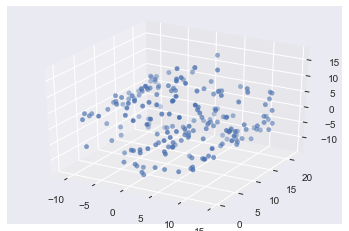

In [7]:
from sklearn.datasets import make_swiss_roll

# generate swiss roll and swiss roll with noise
n,noise = 200,1
swiss_roll_data = make_swiss_roll(n)[0]
swiss_roll_with_noise_data = make_swiss_roll(n, noise)[0]

# plot noise version of swiss roll
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(swiss_roll_with_noise_data[:,0],swiss_roll_with_noise_data[:,1],swiss_roll_with_noise_data[:,2])
swiss_roll_data = pd.DataFrame(swiss_roll_data)
swiss_roll_with_noise_data = pd.DataFrame(swiss_roll_with_noise_data)
print('Number of objects = ', n)
print('Number of features = ',swiss_roll_data.shape[1])

### Moons

Number of objects =  200
Number of features =  3


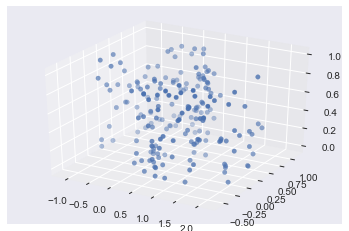

In [8]:
from sklearn.datasets import make_moons

# generate moons and moons with noise
n,noise = 200,0.1
moons_data = np.zeros((n,3))
moons_data[:,0:2] = make_moons(n)[0]
moons_data[:,2] = rand.uniform(0,1,200)

moons_with_noise_data = np.zeros((n,3))
moons_with_noise_data[:,0:2] = make_moons(n,noise=noise)[0]
moons_with_noise_data[:,2] = rand.uniform(0,1,200)

# plot noise version of moons
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(moons_with_noise_data[:,0],moons_with_noise_data[:,1],moons_with_noise_data[:,2])
moons_data = pd.DataFrame(moons_data)
moons_with_noise_data = pd.DataFrame(moons_with_noise_data)
print('Number of objects = ', n)
print('Number of features = ',moons_data.shape[1])

### S Curve

Number of objects =  200
Number of features =  3


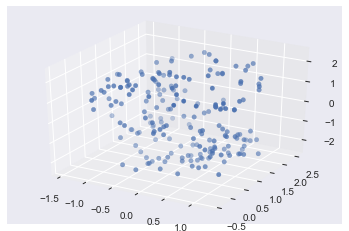

In [9]:
from sklearn.datasets import make_s_curve

# generate s curve and s curve with noise
n,noise = 200,0.2
s_curve_data = make_s_curve(n)[0]
s_curve_with_noise_data = make_s_curve(n,noise=noise)[0]

# plot noise version of s curve
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(s_curve_with_noise_data[:,0],s_curve_with_noise_data[:,1],s_curve_with_noise_data[:,2])
s_curve_data = pd.DataFrame(moons_data)
s_curve_with_noise_data = pd.DataFrame(moons_data)
print('Number of objects = ', n)
print('Number of features = ',s_curve_data.shape[1])


### Airfoils

In [10]:
airfoils_data = pd.read_csv('airfoils.csv')
print('Number of objects = ', airfoils_data.shape[0])
print('Number of features = ',airfoils_data.shape[1])

Number of objects =  198
Number of features =  59


### MNIST

In [21]:
mnist_data = pd.read_csv('mnist.csv')
small_mnist_data = mnist_data.groupby('label').head(100).reset_index(drop=True)
mnist_data = mnist_data.drop('label',axis = 1)
small_mnist_data
small_mnist_data = small_mnist_data.drop('label',axis = 1)
print('Number of objects = ', small_mnist_data.shape[0])
print('Number of features = ',small_mnist_data.shape[1])


Number of objects =  1000
Number of features =  784


### Iris dataset 

In [22]:
from sklearn.datasets import load_iris

iris_data = pd.DataFrame(load_iris().data)
print('Number of objects = ', iris_data.shape[0])
print('Number of features = ',iris_data.shape[1])


Number of objects =  150
Number of features =  4


### Diabetes dataset 

In [13]:
from sklearn.datasets import load_diabetes

diabetes_data = pd.DataFrame(load_diabetes().data)
print('Number of objects = ', diabetes_data.shape[0])
print('Number of features = ',diabetes_data.shape[1])

Number of objects =  442
Number of features =  10


### Boston house-prices dataset

In [14]:
from sklearn.datasets import load_boston

boston_data = pd.DataFrame(load_boston().data)
print('Number of objects = ', boston_data.shape[0])
print('Number of features = ',boston_data.shape[1])

Number of objects =  506
Number of features =  13


### Olivetti faces dataset

In [15]:
from sklearn.datasets import fetch_olivetti_faces

olivetti_data = pd.DataFrame(fetch_olivetti_faces().data)
print('Number of objects = ', olivetti_data.shape[0])
print('Number of features = ',olivetti_data.shape[1])

Number of objects =  400
Number of features =  4096


### California housing dataset 

In [16]:
from sklearn.datasets import fetch_california_housing

california_data = pd.DataFrame(fetch_california_housing().data)
print('Number of objects = ', california_data.shape[0])
print('Number of features = ',california_data.shape[1])

Number of objects =  20640
Number of features =  8


### Labeled Faces in the Wild (LFW) people dataset

In [17]:
from sklearn.datasets import fetch_lfw_people

lfw_data = pd.DataFrame(fetch_lfw_people(resize = 0.5).data)
print('Number of objects = ', lfw_data.shape[0])
print('Number of features = ',lfw_data.shape[1])

Number of objects =  13233
Number of features =  2914


# Methods and Dimensionality Estimation Results

### Levina-Bickel Method
Original paper: [Levina E., Bickel P.J.: Maximum Likelihood Estimation of Intrinsic Dimension](https://www.stat.berkeley.edu/~bickel/mldim.pdf) 

#### Algorithm
Based on implementation: https://codegists.com/snippet/python/intdim_mlepy_mehdidc_python

In [18]:
import pandas as pd
import numpy as np
from sklearn.neighbors import NearestNeighbors

In [19]:
def intrinsic_dim_sample_wise(X, k=5, dist = None):
    """
    Returns Levina-Bickel dimensionality estimation
    
    Input parameters:
    X    - data
    k    - number of nearest neighbours (Default = 5)
    dist - matrix of distances to the k nearest neighbors of each point (Optional)
    
    Returns: 
    dimensionality estimation for the k 
    """
    if dist is None:
        neighb = NearestNeighbors(n_neighbors=k+1,algorithm='ball_tree').fit(X)
        dist, ind = neighb.kneighbors(X)
    dist = dist[:, 1:(k+1)]
    assert dist.shape == (X.shape[0], k)
    assert np.all(dist > 0)
    d = np.log(dist[:, k - 1: k] / dist[:, 0:k - 1])
    d = d.sum(axis=1) / (k - 2)
    d = 1. / d
    intdim_sample = d
    return intdim_sample


def intrinsic_dim_scale_interval(X, k1=10, k2=20, dist = None):
    """
    Returns range of Levina-Bickel dimensionality estimation for k = k1..k2, k1 < k2
    
    Input parameters:
    X    - data
    k1   - minimal number of nearest neighbours (Default = 10)
    k2   - maximal number of nearest neighbours (Default = 20)
    dist - matrix of distances to the k nearest neighbors of each point (Optional)
    
    Returns: 
    list of Levina-Bickel dimensionality estimation for k = k1..k2
    """
    intdim_k = []
    if dist is None:
        neighb = NearestNeighbors(n_neighbors=1,algorithm='ball_tree').fit(X)
        dist, ind = neighb.kneighbors(X)
        
    for k in range(k1, k2 + 1):
        m = intrinsic_dim_sample_wise(X, k,dist).mean()
        intdim_k.append(m)
    return intdim_k


def bootstrap_intrinsic_dim_scale_interval(X, nb_iter=100, random_state=None, k1 = 10, k2 = 20, 
                                           average = True, plot_dependence = False, fig_name = "", title_add = ""):
    """
    Returns range of Levina-Bickel dimensionality estimation for k = k1..k2 (k1 < k2) averaged over bootstrap samples
    
    Input parameters:
    X            - data
    nb_iter      - number of bootstrap iterations (Default = 100)
    random_state - random state (Optional)
    k1           - minimal number of nearest neighbours (Default = 10)
    k2           - maximal number of nearest neighbours (Default = 20)
    average      - if False returns array of shape (nb_iter, k2-k1+1) of the estimations for each bootstrap samples (Default = True)
    
    Returns: 
    array of shape (k2-k1+1,) of Levina-Bickel dimensionality estimation for k = k1..k2 averaged over bootstrap samples
    """
    if random_state is None:
        rng = np.random
    else:
        rng = np.random.RandomState(random_state)
    X = pd.DataFrame(X.drop_duplicates().values)
    nb_examples = X.shape[0]
    results = []
    
    neighb = NearestNeighbors(n_neighbors=k2+1,algorithm='ball_tree').fit(X)
    dist, ind = neighb.kneighbors(X)    
    
    for i in range(nb_iter):
        idx = np.unique(rng.randint(0, nb_examples - 1, size=nb_examples))
        results.append(intrinsic_dim_scale_interval(X.iloc[idx], k1, k2, dist[idx,:]))
    results = np.array(results)
    if plot_dependence:
        dim_of_k = results.mean(axis = 0)
        levina_dimension = dim_of_k.mean()
        print('Dimension averanged over (k=',k1,'..',k2,') = ',levina_dimension)
        plt.plot(np.arange(k1,k2+1),dim_of_k)
        plt.xlabel('k - nearest neighbours')
        plt.ylabel('Dimension')
        if title_add == "":
            plt.title('Original dimension = '+str(X.shape[1])+', L-B dimension = '+str(levina_dimension))
        else:
            plt.title(title_add + ', original dimension = '+str(X.shape[1])+', L-B dimension = '+str(levina_dimension))
        if fig_name != "":
            plt.savefig(fig_name)
    if average:
        return results.mean(axis = 0)
    else:
        return results

#### Applying to spheres

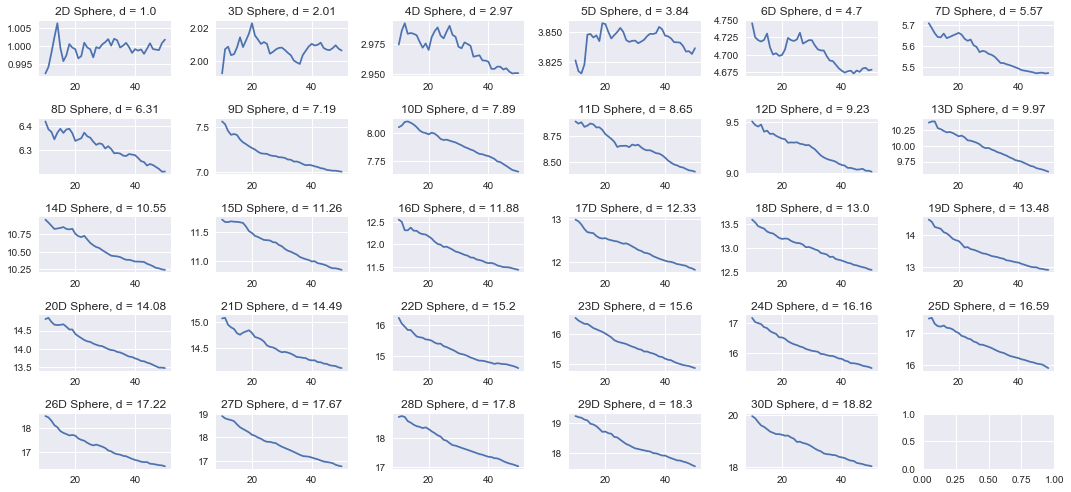

In [18]:
k1 = 10 # start of interval(included)
k2 = 50 # end of interval(included)
f, axarr = plt.subplots(5, 6,figsize=(15,7))
for i in range(len(d_sphere_data)):
    # dimensionality estimation
    dim_of_k = bootstrap_intrinsic_dim_scale_interval(d_sphere_data[i], nb_iter=50, k1=k1, k2=k2)
    levina_dimension = round(dim_of_k.mean(),2)
    
    # plot dependence of dimension estimation from k
    axarr[i//6,i%6].plot(np.arange(k1,k2+1),dim_of_k)
    axarr[i//6,i%6].set_title(str(i+2)+'D Sphere, d = '+str(levina_dimension))
f.tight_layout()
plt.savefig("pic1_1.pdf")

#### Applying to Swiss roll 

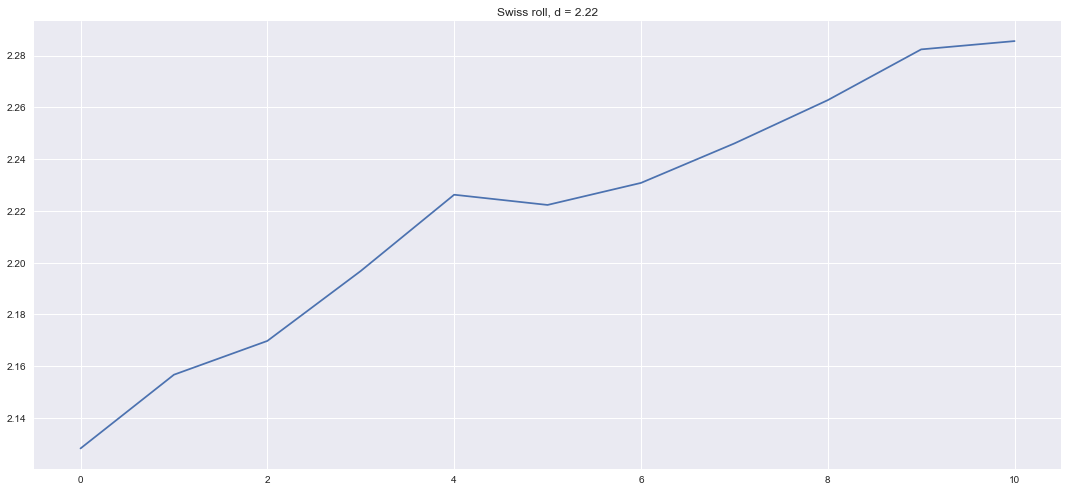

In [73]:
# dimensionality estimation and ploting dependence of dimension estimation from k
k1 = 10 # start of interval(included)
k2 = 20 # end of interval(included)
f, axarr = plt.subplots(1, 1,figsize=(15,7))
# dimensionality estimation
dim_of_k = bootstrap_intrinsic_dim_scale_interval(swiss_roll_data, k1=k1, k2=k2)
levina_dimension = round(dim_of_k.mean(),2)
# plot dependence of dimension estimation from k
axarr.plot(dim_of_k)
axarr.set_title('Swiss roll, d = '+str(levina_dimension))
f.tight_layout()

#### Applying to moons

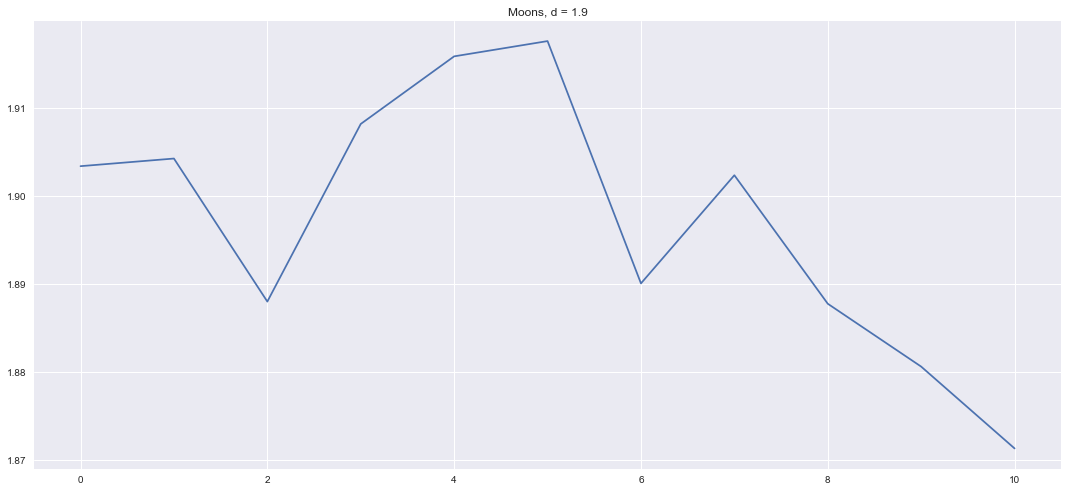

In [20]:
# dimensionality estimation and ploting dependence of dimension estimation from k
k1 = 10 # start of interval(included)
k2 = 20 # end of interval(included)
f, axarr = plt.subplots(1, 1,figsize=(15,7))
# dimensionality estimation
dim_of_k = bootstrap_intrinsic_dim_scale_interval(moons_data, k1=k1, k2=k2)
levina_dimension = round(dim_of_k.mean(),2)
# plot dependence of dimension estimation from k
axarr.plot(dim_of_k)
axarr.set_title('Moons, d = '+str(levina_dimension))
f.tight_layout()

#### Applying to s curve

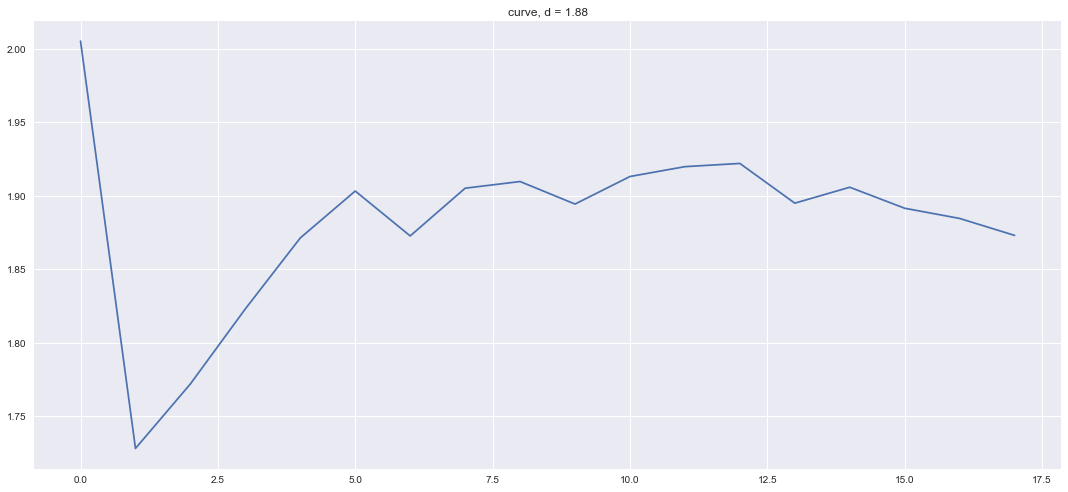

In [21]:
# dimensionality estimation and ploting dependence of dimension estimation from k
k1 = 3 # start of interval(included)
k2 = 20 # end of interval(included)
f, axarr = plt.subplots(1, 1,figsize=(15,7))
# dimensionality estimation
dim_of_k = bootstrap_intrinsic_dim_scale_interval(s_curve_data, k1=k1, k2=k2)
levina_dimension = round(dim_of_k.mean(),2)
# plot dependence of dimension estimation from k
axarr.plot(dim_of_k)
axarr.set_title('curve, d = '+str(levina_dimension))
f.tight_layout()

#### Applying to Airfoils

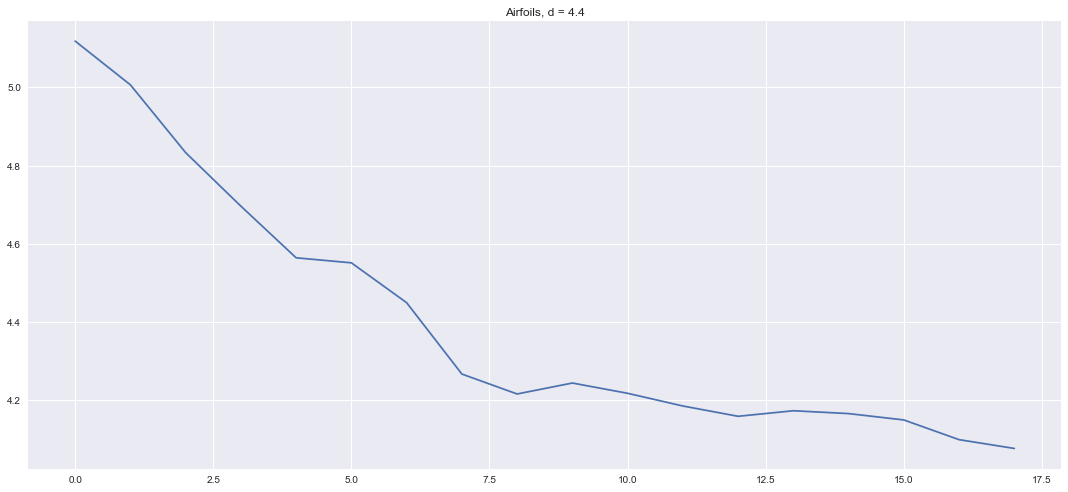

In [22]:
# dimensionality estimation and ploting dependence of k
k1,k2 = 3,20 # start,end of interval(included)
f, axarr = plt.subplots(1, 1,figsize=(15,7))
# dimensionality estimation
dim_of_k = bootstrap_intrinsic_dim_scale_interval(airfoils_data, k1=k1, k2=k2)
levina_dimension = round(dim_of_k.mean(),2)
# plot dependence of dimension estimation from k
axarr.plot(dim_of_k)
axarr.set_title('Airfoils, d = '+str(levina_dimension))
f.tight_layout()

#### Applying to MNIST

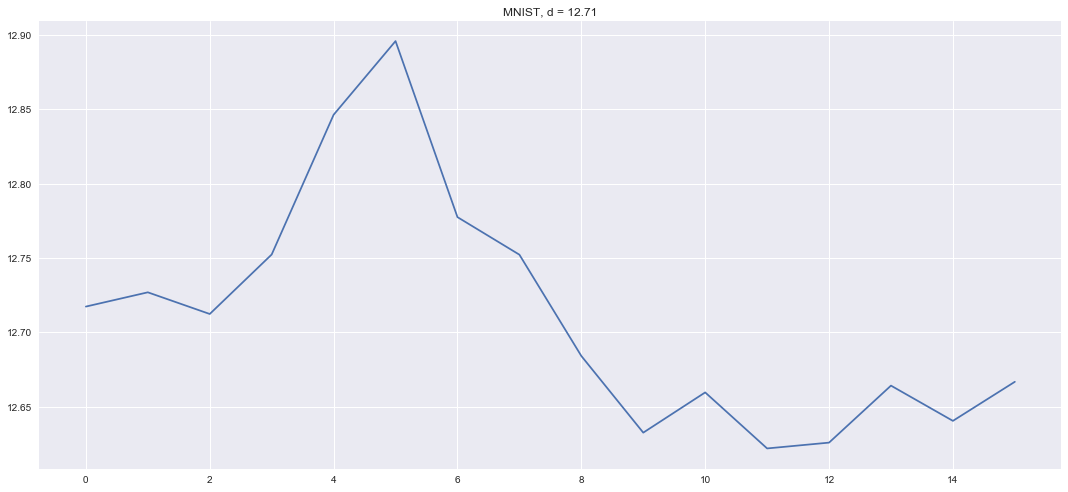

In [144]:
# dimensionality estimation and ploting dependence of k
k1,k2 = 5,20 # start,end of interval(included)
f, axarr = plt.subplots(1, 1,figsize=(15,7))
# dimensionality estimation
dim_of_k = bootstrap_intrinsic_dim_scale_interval(small_mnist_data, k1=k1, k2=k2)
levina_dimension = round(dim_of_k.mean(),2)
# plot dependence of dimension estimation from k
axarr.plot(dim_of_k)
axarr.set_title('MNIST, d = '+str(levina_dimension))
f.tight_layout()

#### Applying to Iris

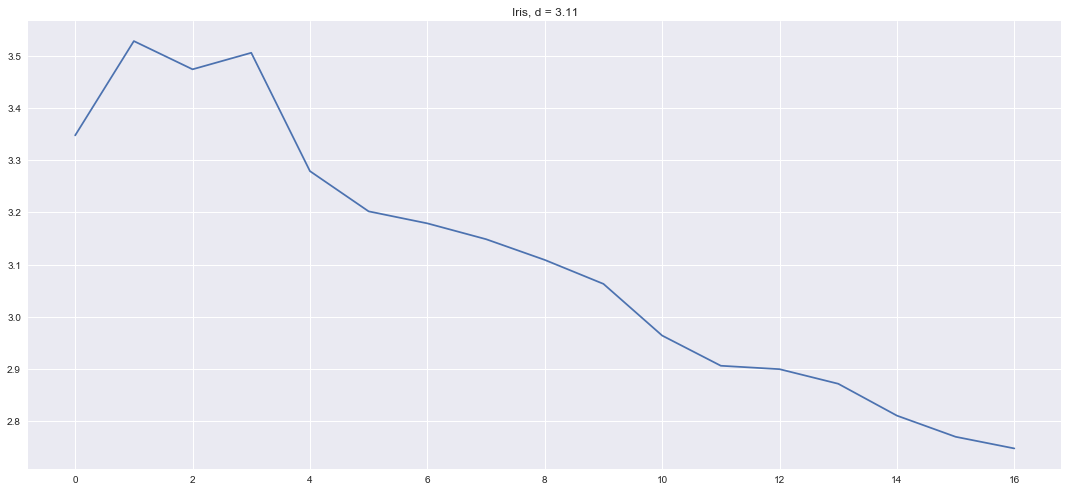

In [145]:
# dimensionality estimation and ploting dependence of k
k1,k2 = 4,20 # start of interval(included)
f, axarr = plt.subplots(1, 1,figsize=(15,7))
# dimensionality estimation
dim_of_k = bootstrap_intrinsic_dim_scale_interval(iris_data, k1=k1, k2=k2)
levina_dimension = round(dim_of_k.mean(),2)
# plot dependence of dimension estimation from k
axarr.plot(dim_of_k)
axarr.set_title('Iris, d = '+str(levina_dimension))
f.tight_layout()

#### Applying to Diabetes

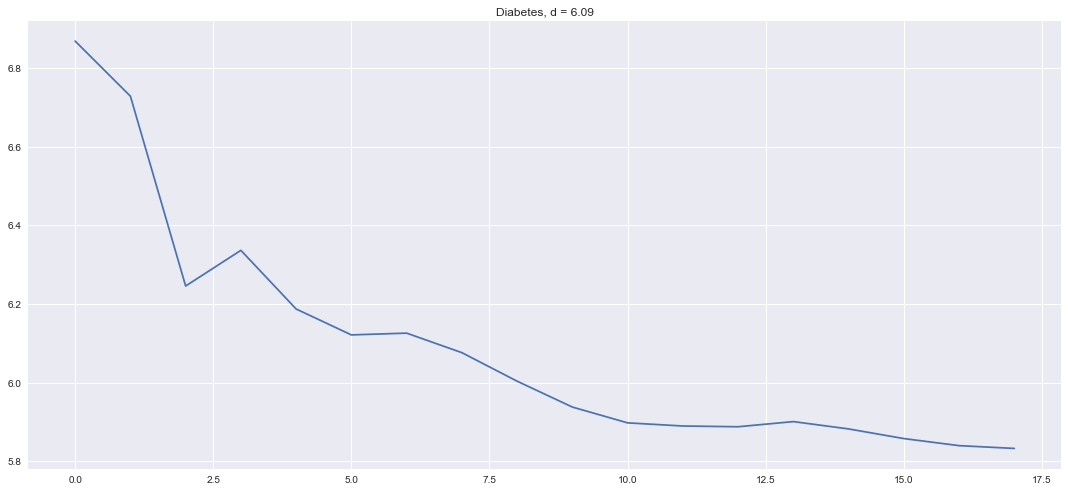

In [146]:
# dimensionality estimation and ploting dependence of k
k1,k2 = 3,20 # start,end of interval(included)
f, axarr = plt.subplots(1, 1,figsize=(15,7))
# dimensionality estimation
dim_of_k = bootstrap_intrinsic_dim_scale_interval(diabetes_data, k1=k1, k2=k2)
levina_dimension = round(dim_of_k.mean(),2)
# plot dependence of dimension estimation from k
axarr.plot(dim_of_k)
axarr.set_title('Diabetes, d = '+str(levina_dimension))
f.tight_layout()

#### Applying to Boston house-prices dataset 

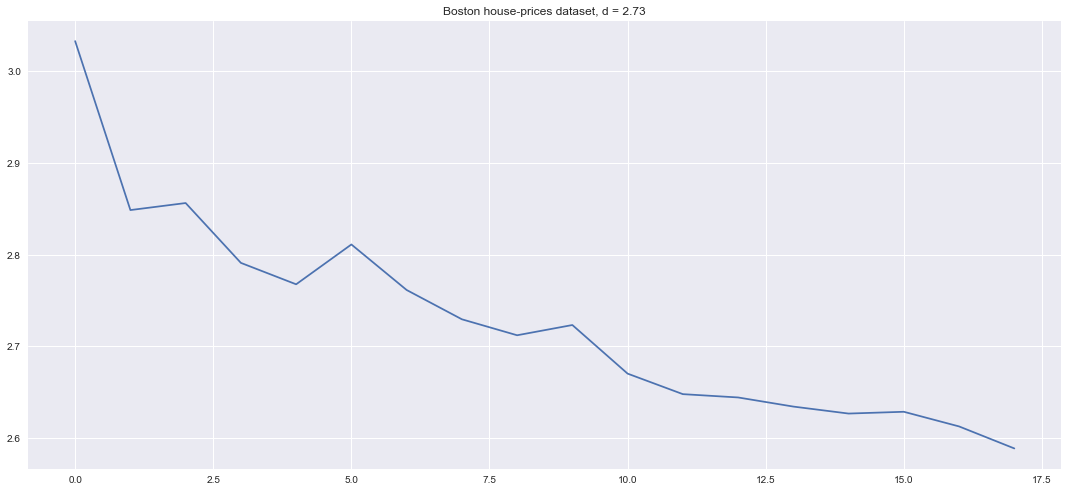

In [147]:
# dimensionality estimation and ploting dependence of k
k1,k2 = 3,20 # start,end of interval(included)
f, axarr = plt.subplots(1, 1,figsize=(15,7))
# dimensionality estimation
dim_of_k = bootstrap_intrinsic_dim_scale_interval(boston_data, k1=k1, k2=k2)
levina_dimension = round(dim_of_k.mean(),2)
# plot dependence of dimension estimation from k
axarr.plot(dim_of_k)
axarr.set_title('Boston house-prices dataset, d = '+str(levina_dimension))
f.tight_layout()

#### Applying to Olivetti faces data-set from AT&T

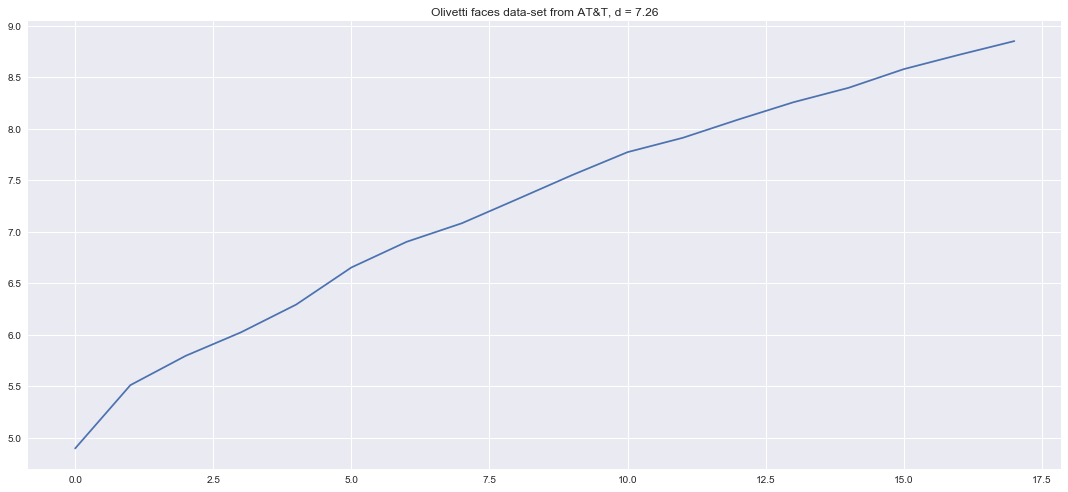

In [148]:
# dimensionality estimation and ploting dependence of k
k1,k2 = 3,20 # start,end of interval(included)
f, axarr = plt.subplots(1, 1,figsize=(15,7))
# dimensionality estimation
dim_of_k = bootstrap_intrinsic_dim_scale_interval(olivetti_data, k1=k1, k2=k2)
levina_dimension = round(dim_of_k.mean(),2)
# plot dependence of dimension estimation from k
axarr.plot(dim_of_k)
axarr.set_title('Olivetti faces data-set from AT&T, d = '+str(levina_dimension))
f.tight_layout()

#### Applying to California housing dataset 

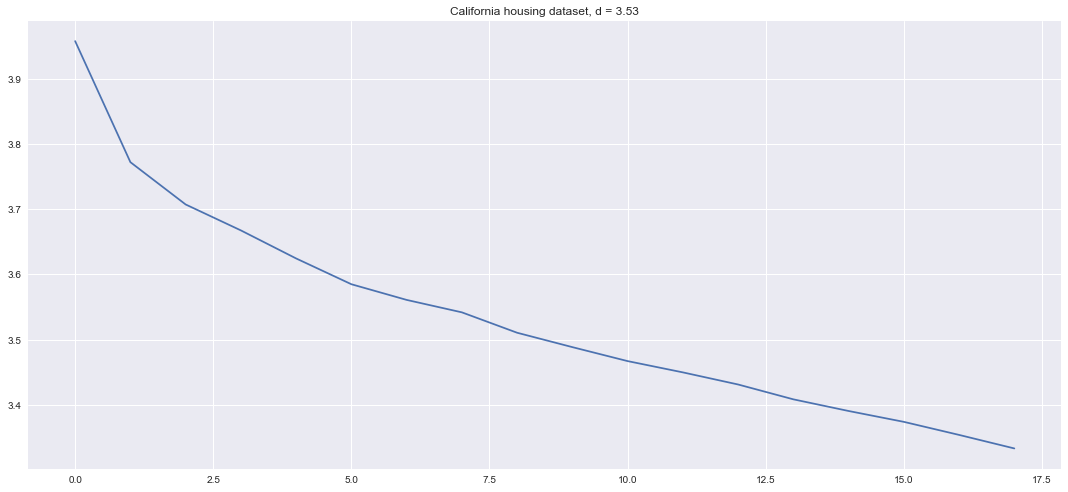

In [149]:
# dimensionality estimation and ploting dependence of k
k1,k2 = 3,20 # start, end of interval(included)
f, axarr = plt.subplots(1, 1,figsize=(15,7))
# dimensionality estimation
dim_of_k = bootstrap_intrinsic_dim_scale_interval(california_data, k1=k1, k2=k2)
levina_dimension = round(dim_of_k.mean(),2)
# plot dependence of dimension estimation from k
axarr.plot(dim_of_k)
axarr.set_title('California housing dataset, d = '+str(levina_dimension))
f.tight_layout()

#### Applying to LFW

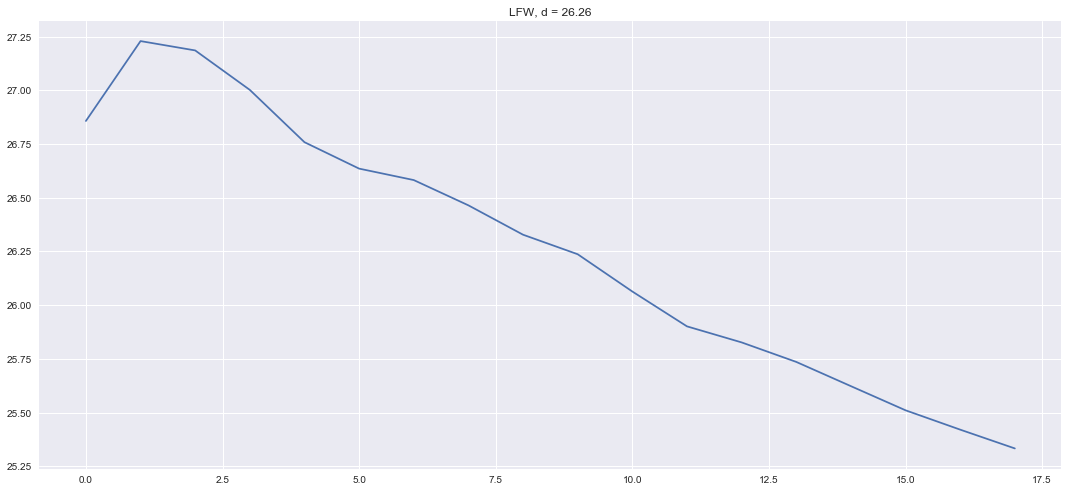

In [21]:
# dimensionality estimation and ploting dependence of k
k1,k2 = 3,20 # start,end of interval(included)
f, axarr = plt.subplots(1, 1,figsize=(15,7))
# dimensionality estimation
dim_of_k = bootstrap_intrinsic_dim_scale_interval(lfw_data, k1=k1, k2=k2)
levina_dimension = round(dim_of_k.mean(),2)
# plot dependence of dimension estimation from k
axarr.plot(dim_of_k)
axarr.set_title('LFW, d = '+str(levina_dimension))
f.tight_layout()

### Isomap
Original paper: [Joshua B. Tenenbaum,Vin de Silva, John C. Langford: A Global Geometric Framework for Nonlinear Dimensionality Reduction](http://wearables.cc.gatech.edu/paper_of_week/isomap.pdf)

#### Algorithm

In [30]:
from sklearn.manifold import Isomap
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform

In [55]:
def compute_residual_variances_of_isomap(X,dims,n_neighbors = 5, plot_dependence = False, fig_name = "", title_add = ""):
    variances = []
    for m in dims:
        transformator = Isomap(n_components=m, n_neighbors=n_neighbors)
        transformator.fit(X)
        X_low = transformator.transform(X)
        D = squareform(pdist(X_low)).reshape(-1)
        D_fit = transformator.dist_matrix_.reshape(-1)
        variances.append(1 - np.corrcoef(D,D_fit)[0,1])
    if plot_dependence:
        plt.plot(dims, variances,'-^')
        plt.xlabel('dimensions')
        plt.ylabel('residual variance')
        if title_add != "":
            plt.title(title_add)
        if fig_name != "":
            plt.savefig(fig_name)
    return variances
        

#### Applying to Spheres

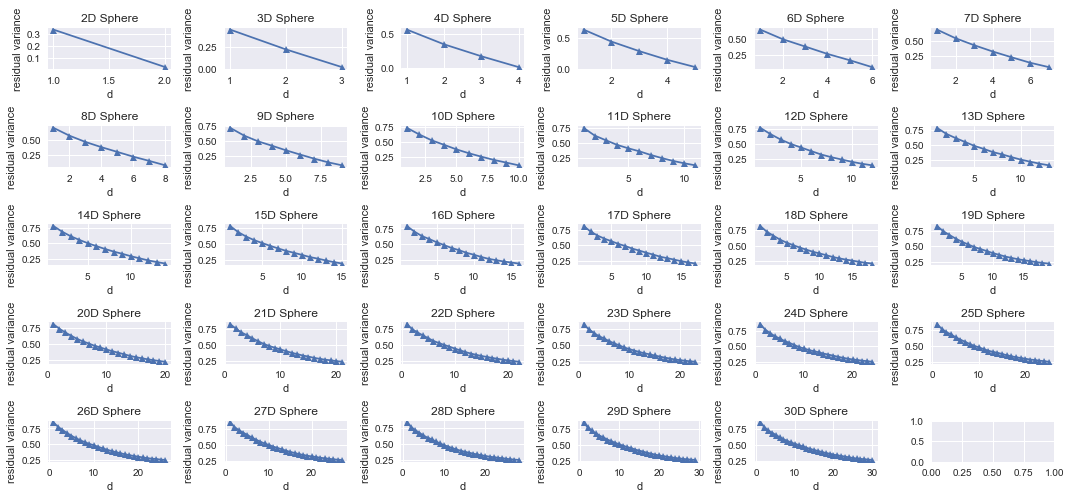

In [32]:
f, axarr = plt.subplots(5, 6,figsize=(15,7))
n_neighbors = 10
for i in range(len(d_sphere_data)):
    # dimensionality estimation
    dims = list(range(1,d_sphere_data[i].shape[1]+1))
    var_of_d = compute_residual_variances_of_isomap(d_sphere_data[i], dims, n_neighbors)
    
    # plot dependence of residual variance from dimension
    axarr[i//6,i%6].plot(dims,var_of_d,'-^')
    axarr[i//6,i%6].set_title(str(i+2)+'D Sphere')
    axarr[i//6,i%6].set_xlabel('d')
    axarr[i//6,i%6].set_ylabel('residual variance')
f.tight_layout()
plt.savefig("pic2_1.pdf")

#### Applying to Swiss roll

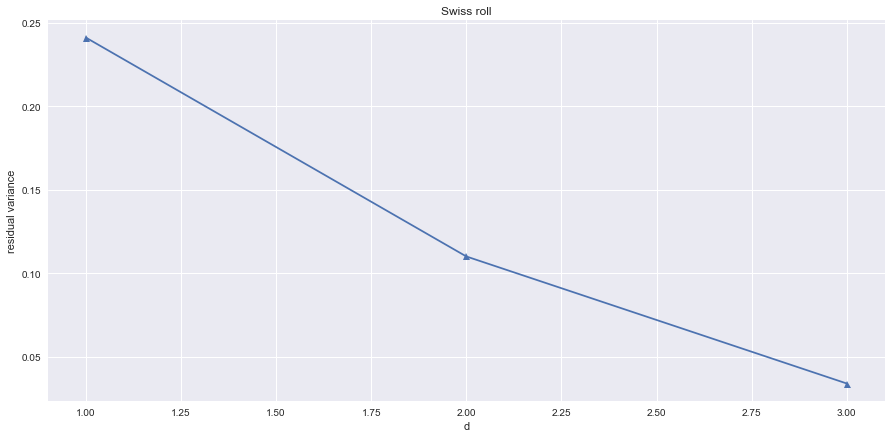

In [34]:
f, axarr = plt.subplots(1, 1,figsize=(15,7))
n_neighbors = 10
# dimensionality estimation
dims = list(range(1,swiss_roll_data.shape[1]+1))
var_of_d = compute_residual_variances_of_isomap(swiss_roll_data, dims, n_neighbors)
# plot dependence of residual variance from dimension
axarr.plot(dims,var_of_d,'-^')
axarr.set_title('Swiss roll')
axarr.set_xlabel('d')
axarr.set_ylabel('residual variance')

#### Applying to Moons

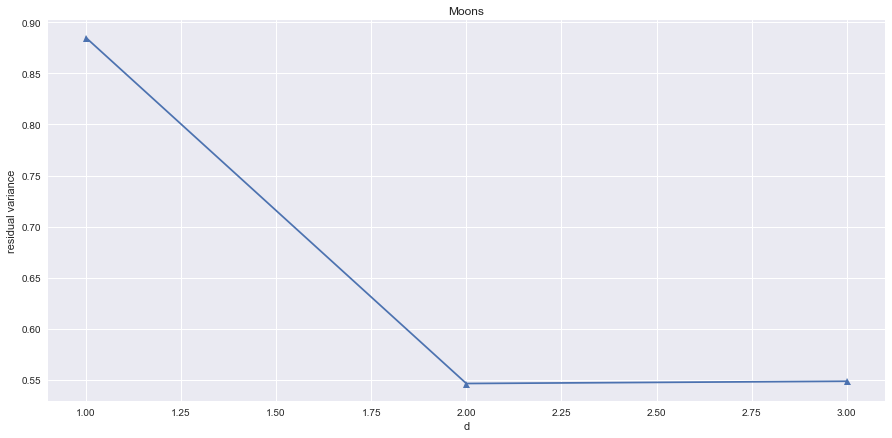

In [36]:
f, axarr = plt.subplots(1, 1,figsize=(15,7))
n_neighbors = 10
# dimensionality estimation
dims = list(range(1,moons_data.shape[1]+1))
var_of_d = compute_residual_variances_of_isomap(moons_data, dims, n_neighbors)
# plot dependence of residual variance from dimension
axarr.plot(dims,var_of_d,'-^')
axarr.set_title('Moons')
axarr.set_xlabel('d')
axarr.set_ylabel('residual variance')

#### Applying to S curve

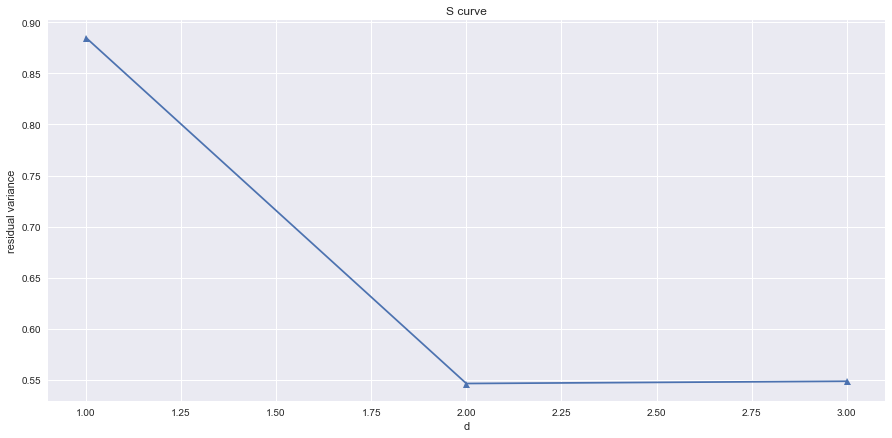

In [38]:
f, axarr = plt.subplots(1, 1,figsize=(15,7))
n_neighbors = 10
# dimensionality estimation
dims = list(range(1,s_curve_data.shape[1]+1))
var_of_d = compute_residual_variances_of_isomap(s_curve_data, dims, n_neighbors)
# plot dependence of residual variance from dimension
axarr.plot(dims,var_of_d,'-^')
axarr.set_title('S curve')
axarr.set_xlabel('d')
axarr.set_ylabel('residual variance')

#### Airfoils

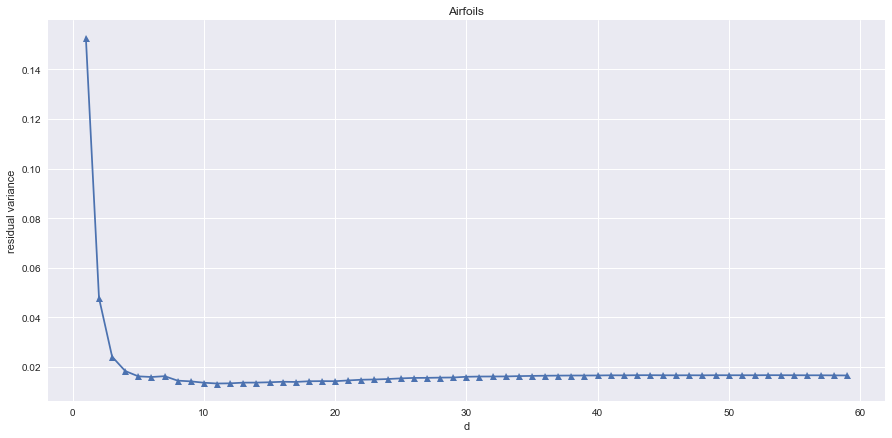

In [40]:
f, axarr = plt.subplots(1, 1,figsize=(15,7))
n_neighbors = 10
# dimensionality estimation
dims = list(range(1,airfoils_data.shape[1]+1))
var_of_d = compute_residual_variances_of_isomap(airfoils_data, dims, n_neighbors)
# plot dependence of residual variance from dimension
axarr.plot(dims,var_of_d,'-^')
axarr.set_title('Airfoils')
axarr.set_xlabel('d')
axarr.set_ylabel('residual variance')

#### Applying to MNIST

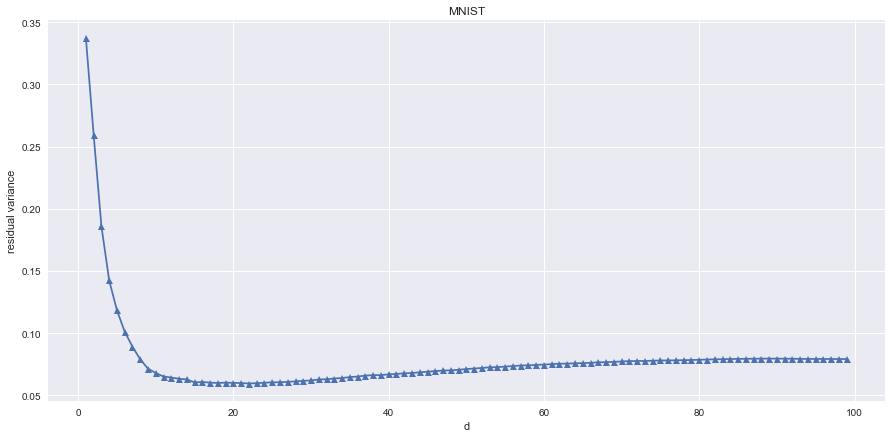

In [60]:
f, axarr = plt.subplots(1, 1,figsize=(15,7))
n_neighbors = 10
# dimensionality estimation
dims = list(range(1,100))
var_of_d = compute_residual_variances_of_isomap(small_mnist_data[:300], dims, n_neighbors)
# plot dependence of residual variance from dimension
axarr.plot(dims,var_of_d,'-^')
axarr.set_title('MNIST')
axarr.set_xlabel('d')
axarr.set_ylabel('residual variance')

#### Applying to Iris

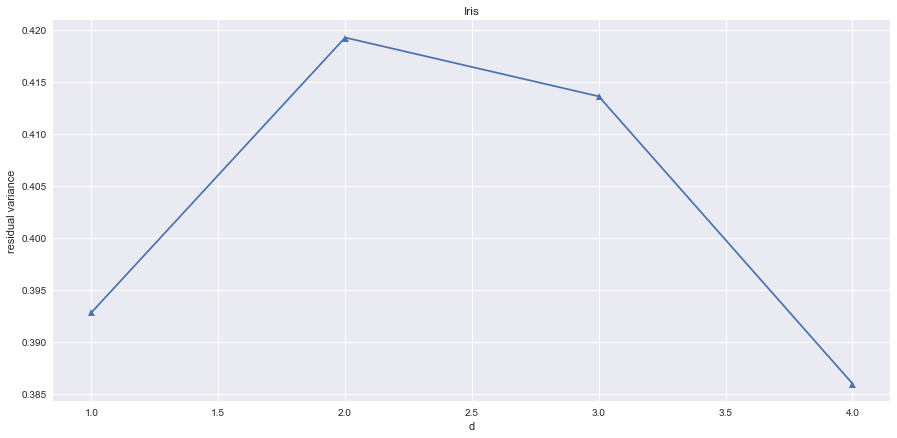

In [44]:
f, axarr = plt.subplots(1, 1,figsize=(15,7))
n_neighbors = 10
# dimensionality estimation
dims = list(range(1,iris_data.shape[1]+1))
var_of_d = compute_residual_variances_of_isomap(iris_data, dims, n_neighbors)
# plot dependence of residual variance from dimension
axarr.plot(dims,var_of_d,'-^')
axarr.set_title('Iris')
axarr.set_xlabel('d')
axarr.set_ylabel('residual variance')

#### Applying to Diabetes dataset

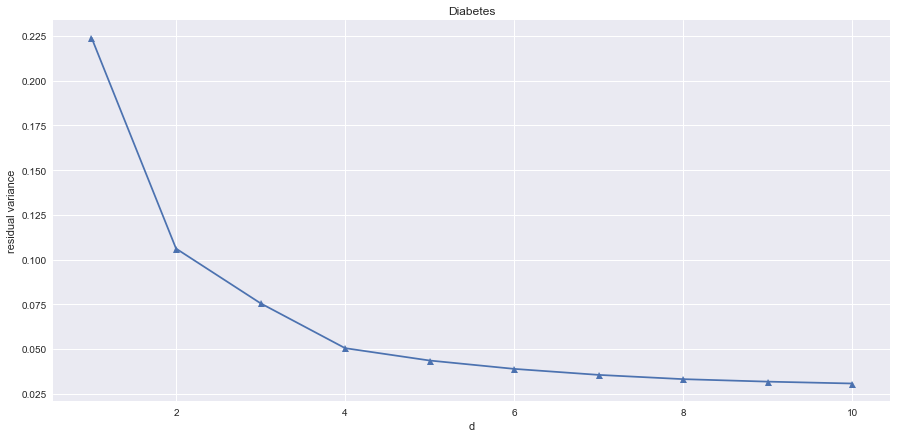

In [45]:
f, axarr = plt.subplots(1, 1,figsize=(15,7))
n_neighbors = 10
# dimensionality estimation
dims = list(range(1,diabetes_data.shape[1]+1))
var_of_d = compute_residual_variances_of_isomap(diabetes_data, dims, n_neighbors)
# plot dependence of residual variance from dimension
axarr.plot(dims,var_of_d,'-^')
axarr.set_title('Diabetes')
axarr.set_xlabel('d')
axarr.set_ylabel('residual variance')

#### Applying to Boston house-prices dataset

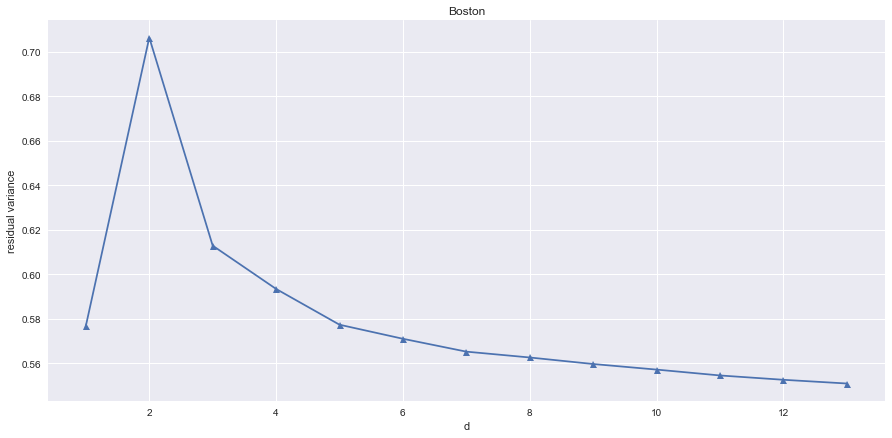

In [46]:
f, axarr = plt.subplots(1, 1,figsize=(15,7))
n_neighbors = 10
# dimensionality estimation
dims = list(range(1,boston_data.shape[1]+1))
var_of_d = compute_residual_variances_of_isomap(boston_data, dims, n_neighbors)
# plot dependence of residual variance from dimension
axarr.plot(dims,var_of_d,'-^')
axarr.set_title('Boston')
axarr.set_xlabel('d')
axarr.set_ylabel('residual variance')

#### Applying to Olivetti faces data-set from AT&T

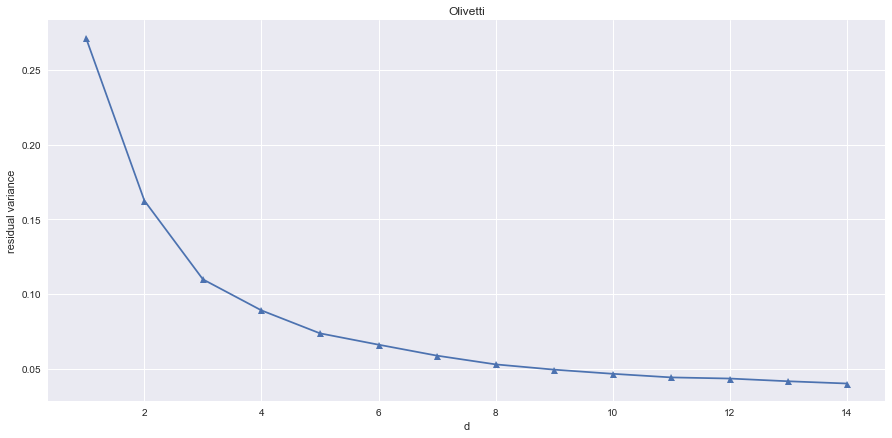

In [65]:
f, axarr = plt.subplots(1, 1,figsize=(15,7))
n_neighbors = 10
# dimensionality estimation
dims = list(range(1, 15))
var_of_d = compute_residual_variances_of_isomap(olivetti_data, dims, n_neighbors)
# plot dependence of residual variance from dimension
axarr.plot(dims,var_of_d,'-^')
axarr.set_title('Olivetti')
axarr.set_xlabel('d')
axarr.set_ylabel('residual variance')

#### Applying to California housing dataset

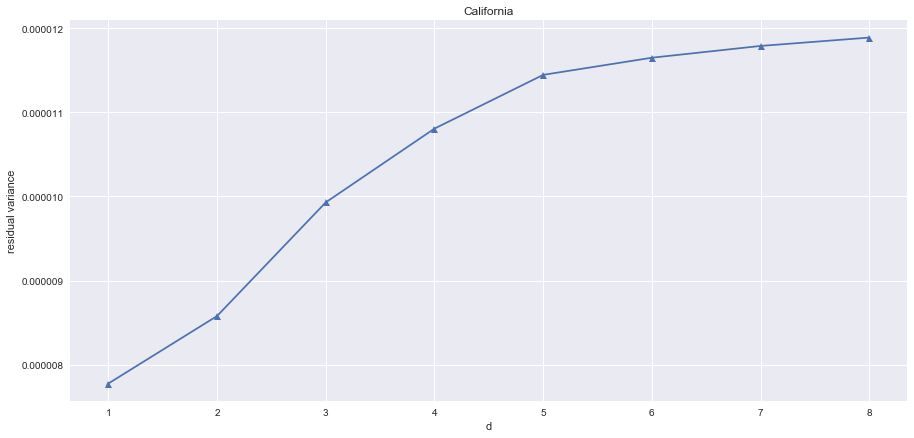

In [66]:
f, axarr = plt.subplots(1, 1,figsize=(15,7))
n_neighbors = 10
# dimensionality estimation
dims = list(range(1,california_data.shape[1]+1))
var_of_d = compute_residual_variances_of_isomap(california_data[:1000], dims, n_neighbors)
# plot dependence of residual variance from dimension
axarr.plot(dims,var_of_d,'-^')
axarr.set_title('California')
axarr.set_xlabel('d')
axarr.set_ylabel('residual variance')

#### Applying to LFW

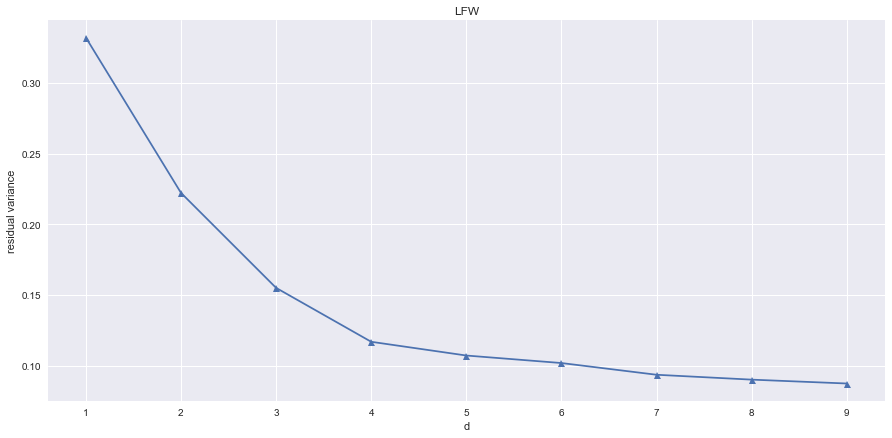

In [68]:
f, axarr = plt.subplots(1, 1,figsize=(15,7))
n_neighbors = 10
# dimensionality estimation
dims = list(range(1,10))
var_of_d = compute_residual_variances_of_isomap(lfw_data[:1000], dims, n_neighbors)
# plot dependence of residual variance from dimension
axarr.plot(dims,var_of_d,'-^')
axarr.set_title('LFW')
axarr.set_xlabel('d')
axarr.set_ylabel('residual variance')

### Granata-Carnevale method
Original paper: [Daniele Granata, Vincenzo Carnevale: Accurate Estimation of the Intrinsic Dimension Using Graph Distances: Unraveling the Geometric Complexity of Datasets](https://www.nature.com/articles/srep31377)

#### Algorithm
Implementation is based on: https://github.com/dgranata/Intrinsic-Dimension

Беда метода в том, что возможно придётся подгонять r_max по графику (второму), чтоб заработало и на 2d всё ломается.

In [3]:
import sys,argparse
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.sparse import csr_matrix
from scipy.spatial import distance
from sklearn.neighbors import kneighbors_graph, radius_neighbors_graph
from sklearn.utils.graph import graph_shortest_path

In [4]:
def func(x,a,b,c):
    return a*np.log(np.sin(x/1*np.pi/2.))
         
def func2(x,a):
    return -a/2.*(x-1)**2

def func3(x,a,b,c):
    return np.exp(c)*np.sin(x/b*np.pi/2.)**a

def id_fit(X = None, me = 'euclidean', matrix = False, dist_mat = None, n_neighbors = 3, radius = 0,
           n_bins = 50, r_max = 0, r_min = -10, direct = False, projection = False, print_results = False, plot_results = False):
    """
	NOTE: it is important to have a smooth histogram for accurate fitting.
     
	 X 				- data, if you have no distance matrix
     metric 		- define the scipy distance to be used   (Default: euclidean or hamming for MSA)
     matrix 		- if you want your oun distances between all objects, set matrix to True and enter dist_mat (Default = False)
	 dist_mat		- square matrix of distances if matrix == True
     n_neighbors 	- nearest_neighbors parameter (Default k=3)
     radius 		- use neighbor radius instead of nearest_neighbors (Opt, Default = 0)
     n_bins 		- number of bins for distance histogram (Defaul = 50)
     r_max 			- fix the value of distance distribution maximum in the fit (Opt, Default = 0)
     r_min			- fix the value of shortest distance considered in the fit 
						(Opt, -1 force the standard fit, avoiding consistency checks, Default = -10)
     direct 		- analyze the direct (not graph) distances (Opt, Default = False)
     projection		- produce an Isomap projection using the first ID components (Opt, Default = False)
     print_results  - output results to console or not (Default = False)
     plot_results   - plot density estimation, log(r/r_max) vs log(p(r)/p(r_max)), root mean square deviation between 
                     the observed distribution and the one of a D-dimensional hypersphere as a function of D(RMSD) vs dimension
     
     returns:
     Dfit           - least square fit for p(r) = C(sin(r))^{D-1}
     Dmin           - argmin of RMSD
     """

    rmax = r_max
    MSA = False
    if me == 'hamming':
        MSA = True
    mm = -10000
    input_f = "results"

    data = X
    if matrix: me = 'as from the input file'

    if radius > 0.:
        filename = str(input_f.split('.')[0]) + 'R' + str(radius)
    else:
        filename = str(input_f.split('.')[0]) + 'K' + str(n_neighbors)
    # 0

    # 1 Computing geodesic distance on connected points of the input file and relative histogram
    if matrix:
        if data.shape[1] == 1:
            dist_mat = distance.squareform(data.ravel())
            mm = dist_mat.shape[1]
        elif data.shape[1] == 3:
            mm = int(max(data[:, 1]))
            dist_mat = np.zeros((mm, mm))
            for i in range(0, data.shape[0]):
                dist_mat[int(data[i, 0]) - 1, int(data[i, 1]) - 1] = data[i, 2]
                dist_mat[int(data[i, 1]) - 1, int(data[i, 0]) - 1] = data[i, 2]
        else:
            print('ERROR: The distances input is not in the right matrix format');  sys.exit(2)
        if print_results:
            print("\n# points: ", mm)

        A = np.zeros((mm, mm))
        rrr = []

        if direct: C = dist_mat
        if radius > 0.:
            for i in range(0, mm):
                ll = dist_mat[i] < radius
                A[i, ll] = dist_mat[i, ll]
        else:
            rrr = np.argsort(dist_mat)
            for i in range(0, mm):
                ll = rrr[i, 0:n_neighbors + 1]
                A[i, ll] = dist_mat[i, ll]
            radius = A.max()
        C = graph_shortest_path(A, directed=False)

    else:
        if direct:
            C = distance.squareform(distance.pdist(data, me));
        elif radius > 0.:
            A = radius_neighbors_graph(data, radius, metric=me, mode='distance')
            C = graph_shortest_path(A, directed=False)
        else:
            A = kneighbors_graph(data, n_neighbors, metric=me, mode='distance')
            C = graph_shortest_path(A, directed=False)
            radius = A.max()

    C = np.asmatrix(C)
    connect = np.zeros(C.shape[0])
    conn = np.zeros(C.shape[0])
    for i in range(0, C.shape[0]):
        conn_points = np.count_nonzero(C[i])
        conn[i] = conn_points
        if conn_points > C.shape[0] / 2.:
            connect[i] = 1
        else:
            C[i] = 0
    
    if np.count_nonzero(connect) > C.shape[0] / 2.:
        if print_results:
            print('Number of connected points:', np.count_nonzero(connect), '(', 100 * np.count_nonzero(connect) / C.shape[0],
                  '% )')
    else:
        print('The neighbors graph is highly disconnected, increase K or Radius parameters'); sys.exit(2)

    indices = np.nonzero(np.triu(C, 1))
    dist_list = np.asarray(C[indices])[-1]

    h = np.histogram(dist_list, n_bins)
    dx = h[1][1] - h[1][0]
    
    fig,ax = None,None
    if plot_results:
        fig,ax = plt.subplots(1,3,figsize=(15,5))
        ax[0].plot(h[1][0:n_bins] + dx / 2, h[0], 'o-', label='histogram')
        ax[0].set_xlabel('r')
        ax[0].set_ylabel('N. counts')
        ax[0].legend()
    distr_x = []
    distr_y = []

    avg = np.mean(dist_list)
    std = np.std(dist_list)

    if rmax > 0:
        avg = rmax
        if print_results:
            print('\nNOTE: You fixed r_max for the initial fitting, average will have the same value')
    else:
        mm = np.argmax(h[0])
        rmax = h[1][mm] + dx / 2

    if r_min >= 0:
        if print_results:
            print('\nNOTE: You fixed r_min for the initial fitting: r_min = ', r_min)
    if r_min == -1:
        if print_results:
            print('\nNOTE: You forced r_min to the standard procedure in the initial fitting')
    if print_results:
        print('\nDistances Statistics:')
        print('Average, standard dev., n_bin, bin_size, r_max, r_NN_max:', avg, std, n_bins, dx, rmax, radius, '\n')
    # 1
    tmp = 1000000
    if (r_min >= 0):
        tmp = r_min
    elif (r_min == -1):
        tmp = rmax - std

    if (np.fabs(rmax - avg) > std):
        print('ERROR: There is a problem with the r_max detection:')
        print(
        '       usually either the histogram is not smooth enough (you may consider changing the n_bins with option -b)')
        print(
        '       or r_max and r_avg are too distant and you may consider to fix the first detection of r_max with option -M')
        print('       or to change the neighbor parameter with (-r/-k)')
        plt.show()
        sys.exit()

    elif (rmax <= min(radius + dx, tmp)):
        print(
        'ERROR: There is a problem with the r_max detection, it is shorter than the largest distance in the neighbors graph.')
        print(
        '       You may consider to fix the first detection of r_max with option -M and/or the r_min with option -n to fix the fit range')
        print('       or to decrease the neighbors parameter with (-r/-k)')
        plt.show()
        sys.exit()

    # 2 Finding actual r_max and std. dev. to define fitting interval [rmin;rM]
    distr_x = h[1][0:n_bins] + dx / 2
    distr_y = h[0][0:n_bins]

    res = np.empty(25)
    left_distr_x = np.empty(n_bins)
    left_distr_y = np.empty(n_bins)
    left_distr_x = distr_x[np.logical_and(distr_x[:] > rmax - std, distr_x[:] < rmax + std / 2.0)]
    print(rmax)
    print(distr_x)
    print(std)
    left_distr_y = np.log(distr_y[np.logical_and(distr_x[:] > rmax - std, distr_x[:] < rmax + std / 2.0)])
    coeff = np.polyfit(left_distr_x, left_distr_y, 2, full='False')
    a0 = coeff[0][0]
    b0 = coeff[0][1]
    c0 = coeff[0][2]
    print(a0)
    
    rmax = -b0 / a0 / 2.0
    if (r_max > 0): rmax = r_max
    std = np.sqrt(-1 / a0 / 2.)
    left_distr_x = distr_x[np.logical_and(distr_x[:] > rmax - std, distr_x[:] < rmax + std / 2.)]
    print(rmax)
    print(distr_x)
    print(std)
    left_distr_y = np.log(distr_y[np.logical_and(distr_x[:] > rmax - std, distr_x[:] < rmax + std / 2.)])
    coeff = np.polyfit(left_distr_x, left_distr_y, 2, full='False')
    a = coeff[0][0]
    b = coeff[0][1]
    c = coeff[0][2]
    print(a)

    rmax_old = rmax
    std_old = std
    rmax = -b / a / 2.
    std = np.sqrt(-1 / a / 2.)  # it was a0
    rmin = max(rmax - 2 * np.sqrt(-1 / a / 2.) - dx / 2, 0.)
    if (r_min >= 0):
        rmin = r_min
    elif (rmin < radius and r_min != -1):
        rmin = radius
        if print_results:
            print(
            '\nWARNING: For internal consistency r_min has been fixed to the largest distance (r_NN_max) in the neighbors graph.')
            print(
            '         It is possible to reset the standard definition of r_min=r_max-2*sigma running with option "-n -1" ')
            print('         or you can use -n to manually define a desired value (Example: -n 0.1)\n')

    rM = rmax + dx / 4

    if (np.fabs(rmax - rmax_old) > std_old / 4):  # fit consistency check
        if print_results:
            print(
            '\nWARNING: The histogram is probably not smooth enough (you may try to change n_bin with -b), rmax is fixed to the value of first iteration\n')
            print(rmax,rmax_old,std/4,std_old/4)
        rmax = rmax_old
        a = a0
        b = b0
        c = c0
        if (r_min >= 0):
            rmin = r_min
        elif (rmin < radius and r_min != -1):
            rmin = radius
            if print_results:
                print(
                '\nWARNING2: For internal consistency r_min has been fixed to the largest distance in the neighbors graph (r_NN_max).')
                print(
                '          It is possible to reset the standard definition of r_min=r_max-2*sigma running with option "-n -1" ')
                print('          or you can use -n to manually define a desired value (Example: -n 0.1)\n')
        rM = rmax + dx / 4
    # 2

    # 3 Gaussian Fitting to determine ratio R
    print(rmin, rmax, rM)
    left_distr_x = distr_x[
                       np.logical_and(np.logical_and(distr_x[:] > rmin, distr_x[:] <= rM), distr_y[:] > 0.000001)] / rmax
    left_distr_y = np.log(
        distr_y[np.logical_and(np.logical_and(distr_x[:] > rmin, distr_x[:] <= rM), distr_y[:] > 0.000001)]) - (
                                                                                                             4 * a * c - b ** 2) / 4. / a
    print(left_distr_x)
    fit = curve_fit(func2, left_distr_x, left_distr_y)
    ratio = np.sqrt(fit[0][0])
    y1 = func2(left_distr_x, fit[0][0])
    # 3

    # 4 Geodesics D-Hypersphere Distribution Fitting to determine Dfit

    fit = curve_fit(func, left_distr_x, left_distr_y)
    Dfit = (fit[0][0]) + 1

    y2 = func(left_distr_x, fit[0][0], fit[0][1], fit[0][2])
    # 4


    # 5 Determination of Dmin

#     D_file = open('D_residual_{0}.dat'.format(filename), "w")

    for D in range(1, 26):
        y = (func(left_distr_x, D - 1, 1, 0))
        for i in range(0, len(y)):
            res[D - 1] = np.linalg.norm((y) - (left_distr_y)) / np.sqrt(len(y))
#         D_file.write("%s " % D)
#         D_file.write("%s\n" % res[D - 1])

    Dmin = np.argmax(-res) + 1

    y = func(left_distr_x, Dmin - 1, fit[0][1], 0)
    # 5

    # 6 Printing results
    if print_results:
        print('\nFITTING PARAMETERS:')
        print('rmax, std. dev., rmin', rmax, std, rmin)
        print('\nFITTING RESULTS:')
        print('R, Dfit, Dmin', ratio, Dfit, Dmin, '\n')

    if plot_results:
        ax[1].plot(left_distr_x, left_distr_y, 'o-', label=str(input_f.split('.')[0]))
        ax[1].plot(left_distr_x, y1, label='Gaussian fit for R ratio')
        ax[1].plot(left_distr_x, y2, label='D-Hypersphere Fit for D_fit')
        ax[1].plot(left_distr_x, y, label='D_min-Hypersphere Distribution')
        ax[1].set_xlabel('r/r$_{max}$')
        ax[1].set_ylabel('log p(r)/p(r$_{max}$)')
        ax[1].legend(loc=4)
        
        ax[2].plot(range(1, 26), res, 'o-', label=str(input_f.split('.')[0]) + ' D_min')
        ax[2].legend()
        ax[2].set_xlabel('D')
        ax[2].set_ylabel('RMDS')
#         plt.show()
    #     plt.savefig(str(input_f.split('.')[0]) + '_Dmin.png')

    # 6

    # 7 Optional: Isomap projection
    if projection:
        from sklearn.decomposition import KernelPCA
        C2 = (distance.squareform(dist_list)) ** 2
        C2 = -.5 * C2
        obj_pj = KernelPCA(n_components=100, kernel="precomputed")
        proj = obj_pj.fit_transform(C2)
        np.savetxt('proj_' + str(input_f.split('.')[0]) + '.dat', proj[:, 0:Dmin])
    return Dfit,Dmin
#     print('NOTE: it is important to have a smooth histogram for accurate fitting\n')


#### Применение к сферам

In [71]:
spheres_dimensions = pd.DataFrame()
spheres_dimensions['Sphere dimension'] = list(range(2,len(d_sphere_data)+2))
spheres_dimensions['D_min'] = list(range(len(spheres_dimensions)))
spheres_dimensions['D_fit'] = np.round(np.linspace(0,1,len(spheres_dimensions)),2)
for i in range(1,len(d_sphere_data)):
    D_fit,D_min = id_fit(d_sphere_data[i],r_max = 1.5,n_neighbors=10,direct = True,plot_results=False)
    spheres_dimensions['D_min'][i] = D_min
    spheres_dimensions['D_fit'][i] = np.round(D_fit,2)
pd.options.display.max_columns = 30
spheres_dimensions.transpose()

/Users/viktor/anaconda/lib/python3.6/site-packages/scipy/optimize/minpack.py:779: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/viktor/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/Users/viktor/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28
Sphere dimension,2.0,3.00,4.00,5.00,6.00,7.00,8.00,9.00,10.00,11.00,12.00,13.0,14.00,15.00,16.00,17.00,18.00,19.00,20.0,21.0,22.00,23.00,24.00,25.00,26.00,27.00,28.0,29.0,30.00
D_min,0.0,3.00,3.00,5.00,6.00,8.00,9.00,11.00,12.00,14.00,15.00,13.0,14.00,15.00,16.00,16.00,17.00,18.00,19.0,19.0,20.00,21.00,21.00,22.00,23.00,23.00,24.0,24.0,25.00
D_fit,0.0,2.64,3.45,4.86,6.22,7.72,9.23,10.72,12.27,13.56,14.87,13.2,14.03,14.85,15.64,16.48,17.22,17.85,18.8,19.3,19.76,21.05,21.31,22.31,22.56,23.23,24.0,24.4,25.29


#### Applying to Swiss roll

In [115]:
swiss_roll_dimensions = pd.DataFrame()
swiss_roll_dimensions['Swiss roll dimension'] = list(range(3,swiss_roll_data.shape[1]+1))
swiss_roll_dimensions['D_min'] = list(range(3,swiss_roll_data.shape[1]+1))
swiss_roll_dimensions['D_fit'] = np.round(np.linspace(0,1,len(swiss_roll_dimensions)),2)
D_fit,D_min = id_fit(swiss_roll_data,r_max = 2,n_neighbors=10,direct = True,plot_results=False)
swiss_roll_dimensions['D_min'] = D_min
swiss_roll_dimensions['D_fit'] = np.round(D_fit,2)
pd.options.display.max_columns = 30
swiss_roll_dimensions.transpose()

2
[  0.3387995    0.95469414   1.57058879   2.18648343   2.80237808
   3.41827273   4.03416737   4.65006202   5.26595666   5.88185131
   6.49774596   7.1136406    7.72953525   8.34542989   8.96132454
   9.57721919  10.19311383  10.80900848  11.42490312  12.04079777
  12.65669242  13.27258706  13.88848171  14.50437635  15.120271
  15.73616565  16.35206029  16.96795494  17.58384958  18.19974423
  18.81563888  19.43153352  20.04742817  20.66332281  21.27921746
  21.89511211  22.51100675  23.1269014   23.74279604  24.35869069
  24.97458533  25.59047998  26.20637463  26.82226927  27.43816392
  28.05405856  28.66995321  29.28584786  29.9017425   30.51763715]
5.6212025938
-0.16325218672
2
[  0.3387995    0.95469414   1.57058879   2.18648343   2.80237808
   3.41827273   4.03416737   4.65006202   5.26595666   5.88185131
   6.49774596   7.1136406    7.72953525   8.34542989   8.96132454
   9.57721919  10.19311383  10.80900848  11.42490312  12.04079777
  12.65669242  13.27258706  13.88848171  14.5

/Users/viktor/anaconda/lib/python3.6/site-packages/scipy/optimize/minpack.py:779: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


,0
Swiss roll dimension,3.00
D_min,3.00
D_fit,2.96


#### Applying to Moons

In [88]:
moons_dimensions = pd.DataFrame()
moons_dimensions['Moons dimension'] = list(range(3, 4))
moons_dimensions['D_min'] = list(range(3, 4))
moons_dimensions['D_fit'] = np.round(np.linspace(0,1,len(moons_dimensions)),2)
D_fit,D_min = id_fit(moons_data,r_max = 1,n_neighbors=10,direct = True,plot_results=False)
moons_dimensions['D_min'] = D_min
moons_dimensions['D_fit'] = np.round(D_fit,2)
pd.options.display.max_columns = 30
moons_dimensions.transpose()

1
[ 0.06390127  0.12619438  0.18848749  0.2507806   0.31307372  0.37536683
  0.43765994  0.49995305  0.56224616  0.62453927  0.68683238  0.7491255
  0.81141861  0.87371172  0.93600483  0.99829794  1.06059105  1.12288417
  1.18517728  1.24747039  1.3097635   1.37205661  1.43434972  1.49664283
  1.55893595  1.62122906  1.68352217  1.74581528  1.80810839  1.8704015
  1.93269461  1.99498773  2.05728084  2.11957395  2.18186706  2.24416017
  2.30645328  2.3687464   2.43103951  2.49333262  2.55562573  2.61791884
  2.68021195  2.74250506  2.80479818  2.86709129  2.9293844   2.99167751
  3.05397062  3.11626373]
0.645730157464
-2.42995790997
1
[ 0.06390127  0.12619438  0.18848749  0.2507806   0.31307372  0.37536683
  0.43765994  0.49995305  0.56224616  0.62453927  0.68683238  0.7491255
  0.81141861  0.87371172  0.93600483  0.99829794  1.06059105  1.12288417
  1.18517728  1.24747039  1.3097635   1.37205661  1.43434972  1.49664283
  1.55893595  1.62122906  1.68352217  1.74581528  1.80810839  1.870

/Users/viktor/anaconda/lib/python3.6/site-packages/scipy/optimize/minpack.py:779: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


,0
Moons dimension,3.00
D_min,3.00
D_fit,2.86


#### Applying to S curve

In [89]:
s_curve_dimensions = pd.DataFrame()
s_curve_dimensions['S curve dimension'] = list(range(s_curve_data.shape[1],s_curve_data.shape[1]+1))
s_curve_dimensions['D_min'] = list(range(s_curve_data.shape[1],s_curve_data.shape[1]+1))
s_curve_dimensions['D_fit'] = np.round(np.linspace(0,1,len(s_curve_dimensions)),2)
D_fit,D_min = id_fit(s_curve_data,r_max = 1,n_neighbors=10,direct = True,plot_results=False)
s_curve_dimensions['D_min'] = D_min
s_curve_dimensions['D_fit'] = np.round(D_fit,2)
pd.options.display.max_columns = 30
s_curve_dimensions.transpose()

1
[ 0.06390127  0.12619438  0.18848749  0.2507806   0.31307372  0.37536683
  0.43765994  0.49995305  0.56224616  0.62453927  0.68683238  0.7491255
  0.81141861  0.87371172  0.93600483  0.99829794  1.06059105  1.12288417
  1.18517728  1.24747039  1.3097635   1.37205661  1.43434972  1.49664283
  1.55893595  1.62122906  1.68352217  1.74581528  1.80810839  1.8704015
  1.93269461  1.99498773  2.05728084  2.11957395  2.18186706  2.24416017
  2.30645328  2.3687464   2.43103951  2.49333262  2.55562573  2.61791884
  2.68021195  2.74250506  2.80479818  2.86709129  2.9293844   2.99167751
  3.05397062  3.11626373]
0.645730157464
-2.42995790997
1
[ 0.06390127  0.12619438  0.18848749  0.2507806   0.31307372  0.37536683
  0.43765994  0.49995305  0.56224616  0.62453927  0.68683238  0.7491255
  0.81141861  0.87371172  0.93600483  0.99829794  1.06059105  1.12288417
  1.18517728  1.24747039  1.3097635   1.37205661  1.43434972  1.49664283
  1.55893595  1.62122906  1.68352217  1.74581528  1.80810839  1.870

/Users/viktor/anaconda/lib/python3.6/site-packages/scipy/optimize/minpack.py:779: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


,0
S curve dimension,3.00
D_min,3.00
D_fit,2.86


#### Применение к Airfoils

0.016
[ 0.00435756  0.00735721  0.01035686  0.01335651  0.01635617  0.01935582
  0.02235547  0.02535513  0.02835478  0.03135443  0.03435408  0.03735374
  0.04035339  0.04335304  0.04635269  0.04935235  0.052352    0.05535165
  0.0583513   0.06135096  0.06435061  0.06735026  0.07034991  0.07334957
  0.07634922  0.07934887  0.08234852  0.08534818  0.08834783  0.09134748
  0.09434713  0.09734679  0.10034644  0.10334609  0.10634574  0.1093454
  0.11234505  0.1153447   0.11834435  0.12134401  0.12434366  0.12734331
  0.13034296  0.13334262  0.13634227  0.13934192  0.14234157  0.14534123
  0.14834088  0.15134053]
0.0240482229562
-11070.5230915
0.016
[ 0.00435756  0.00735721  0.01035686  0.01335651  0.01635617  0.01935582
  0.02235547  0.02535513  0.02835478  0.03135443  0.03435408  0.03735374
  0.04035339  0.04335304  0.04635269  0.04935235  0.052352    0.05535165
  0.0583513   0.06135096  0.06435061  0.06735026  0.07034991  0.07334957
  0.07634922  0.07934887  0.08234852  0.08534818  0.0883

/Users/viktor/anaconda/lib/python3.6/site-packages/scipy/optimize/minpack.py:779: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


,0
Airfoils dimension,59.00
D_min,16.00
D_fit,15.58


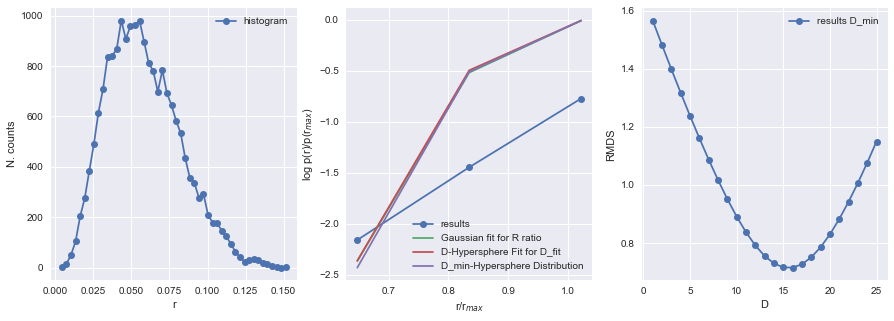

In [105]:
airfoils_dimensions = pd.DataFrame()
airfoils_dimensions['Airfoils dimension'] = list(range(airfoils_data.shape[1],airfoils_data.shape[1]+1))
airfoils_dimensions['D_min'] = list(range(airfoils_data.shape[1],airfoils_data.shape[1]+1))
airfoils_dimensions['D_fit'] = np.round(np.linspace(0,1,len(airfoils_dimensions)),2)
D_fit,D_min = id_fit(airfoils_data,r_max = 0.016,n_neighbors=10,direct = True,plot_results=True)
airfoils_dimensions['D_min'] = D_min
airfoils_dimensions['D_fit'] = np.round(D_fit,2)
pd.options.display.max_columns = 30
airfoils_dimensions.transpose()

#### Применение к MNIST

In [23]:
mnist_dimensions = pd.DataFrame()
mnist_dimensions['MNIST dimension'] = list(range(small_mnist_data.shape[1],small_mnist_data.shape[1]+1))
mnist_dimensions['D_min'] = list(range(small_mnist_data.shape[1],small_mnist_data.shape[1]+1))
mnist_dimensions['D_fit'] = np.round(np.linspace(0,1,len(mnist_dimensions)),2)
D_fit,D_min = id_fit(small_mnist_data,r_max = 2099,n_neighbors=10,direct = True,plot_results=False)
mnist_dimensions['D_min'] = D_min
mnist_dimensions['D_fit'] = np.round(D_fit,2)
pd.options.display.max_columns = 30
mnist_dimensions.transpose()

2099
[  419.91808035   489.72047555   559.52287075   629.32526595   699.12766115
   768.93005635   838.73245155   908.53484675   978.33724195  1048.13963715
  1117.94203235  1187.74442755  1257.54682275  1327.34921795  1397.15161315
  1466.95400835  1536.75640355  1606.55879875  1676.36119395  1746.16358915
  1815.96598435  1885.76837955  1955.57077475  2025.37316995  2095.17556515
  2164.97796035  2234.78035555  2304.58275075  2374.38514595  2444.18754115
  2513.98993635  2583.79233155  2653.59472675  2723.39712195  2793.19951715
  2863.00191235  2932.80430755  3002.60670275  3072.40909795  3142.21149315
  3212.01388835  3281.81628355  3351.61867875  3421.42107395  3491.22346915
  3561.02586435  3630.82825955  3700.63065475  3770.43304995  3840.23544515]
365.776618105
-2.72738779964e-06
2099
[  419.91808035   489.72047555   559.52287075   629.32526595   699.12766115
   768.93005635   838.73245155   908.53484675   978.33724195  1048.13963715
  1117.94203235  1187.74442755  1257.5468227

/Users/viktor/anaconda/lib/python3.6/site-packages/scipy/optimize/minpack.py:779: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


,0
MNIST dimension,784.00
D_min,25.00
D_fit,388.15


#### Applying to Iris

In [24]:
iris_dimensions = pd.DataFrame()
iris_dimensions['Iris dimension'] = list(range(iris_data.shape[1], iris_data.shape[1]+1))
iris_dimensions['D_min'] = list(range(iris_data.shape[1], iris_data.shape[1]+1))
iris_dimensions['D_fit'] = np.round(np.linspace(0,1,len(iris_dimensions)),2)
D_fit,D_min = id_fit(iris_data,r_max = 1.1,n_neighbors=10,direct = True,plot_results=False)
iris_dimensions['D_min'] = D_min
iris_dimensions['D_fit'] = np.round(D_fit,2)
pd.options.display.max_columns = 30
iris_dimensions.transpose()

1.1
[ 0.16985196  0.30955588  0.44925979  0.58896371  0.72866763  0.86837154
  1.00807546  1.14777938  1.28748329  1.42718721  1.56689113  1.70659504
  1.84629896  1.98600288  2.12570679  2.26541071  2.40511463  2.54481854
  2.68452246  2.82422638  2.96393029  3.10363421  3.24333813  3.38304204
  3.52274596  3.66244988  3.80215379  3.94185771  4.08156163  4.22126554
  4.36096946  4.50067338  4.64037729  4.78008121  4.91978513  5.05948904
  5.19919296  5.33889688  5.47860079  5.61830471  5.75800863  5.89771254
  6.03741646  6.17712038  6.31682429  6.45652821  6.59623213  6.73593604
  6.87563996  7.01534388]
1.63292932988
-1.75067067246
1.1
[ 0.16985196  0.30955588  0.44925979  0.58896371  0.72866763  0.86837154
  1.00807546  1.14777938  1.28748329  1.42718721  1.56689113  1.70659504
  1.84629896  1.98600288  2.12570679  2.26541071  2.40511463  2.54481854
  2.68452246  2.82422638  2.96393029  3.10363421  3.24333813  3.38304204
  3.52274596  3.66244988  3.80215379  3.94185771  4.08156163 

/Users/viktor/anaconda/lib/python3.6/site-packages/scipy/optimize/minpack.py:779: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


,0
Iris dimension,4.00
D_min,2.00
D_fit,2.05


#### Applying to Diabetes dataset

In [25]:
diabetes_dimensions = pd.DataFrame()
diabetes_dimensions['Diabetes dimension'] = list(range(diabetes_data.shape[1], diabetes_data.shape[1]+1))
diabetes_dimensions['D_min'] = list(range(diabetes_data.shape[1], diabetes_data.shape[1]+1))
diabetes_dimensions['D_fit'] = np.round(np.linspace(0,1,len(diabetes_dimensions)),2)
D_fit,D_min = id_fit(diabetes_data,r_max = 0.159,n_neighbors=10,direct = True,plot_results=False)
diabetes_dimensions['D_min'] = D_min
diabetes_dimensions['D_fit'] = np.round(D_fit,2)
pd.options.display.max_columns = 30
diabetes_dimensions.transpose()

0.159
[ 0.0277969   0.03795843  0.04811996  0.05828149  0.06844301  0.07860454
  0.08876607  0.0989276   0.10908913  0.11925066  0.12941219  0.13957372
  0.14973525  0.15989678  0.17005831  0.18021984  0.19038137  0.2005429
  0.21070443  0.22086596  0.23102749  0.24118902  0.25135055  0.26151208
  0.27167361  0.28183514  0.29199667  0.3021582   0.31231973  0.32248126
  0.33264279  0.34280432  0.35296585  0.36312738  0.37328891  0.38345044
  0.39361197  0.4037735   0.41393503  0.42409656  0.43425809  0.44441962
  0.45458115  0.46474268  0.47490421  0.48506574  0.49522727  0.5053888
  0.51555033  0.52571186]
0.0623148460419
-233.367181342
0.159
[ 0.0277969   0.03795843  0.04811996  0.05828149  0.06844301  0.07860454
  0.08876607  0.0989276   0.10908913  0.11925066  0.12941219  0.13957372
  0.14973525  0.15989678  0.17005831  0.18021984  0.19038137  0.2005429
  0.21070443  0.22086596  0.23102749  0.24118902  0.25135055  0.26151208
  0.27167361  0.28183514  0.29199667  0.3021582   0.312319

/Users/viktor/anaconda/lib/python3.6/site-packages/scipy/optimize/minpack.py:779: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


,0
Diabetes dimension,10.00
D_min,10.00
D_fit,9.64


#### Applying to Boston house-prices

In [26]:
house_prices_dimensions = pd.DataFrame()
house_prices_dimensions['Boston dimension'] = list(range(boston_data.shape[1], boston_data.shape[1]+1))
house_prices_dimensions['D_min'] = list(range(boston_data.shape[1], boston_data.shape[1]+1))
house_prices_dimensions['D_fit'] = np.round(np.linspace(0,1,len(house_prices_dimensions)),2)
D_fit,D_min = id_fit(boston_data,r_max = 29,n_neighbors=10,direct = True,plot_results=False)
house_prices_dimensions['D_min'] = D_min
house_prices_dimensions['D_fit'] = np.round(D_fit,2)
pd.options.display.max_columns = 30
house_prices_dimensions.transpose()

29
[   6.66838235   19.16326594   31.65814953   44.15303312   56.64791672
   69.14280031   81.6376839    94.1325675   106.62745109  119.12233468
  131.61721827  144.11210187  156.60698546  169.10186905  181.59675265
  194.09163624  206.58651983  219.08140342  231.57628702  244.07117061
  256.5660542   269.0609378   281.55582139  294.05070498  306.54558857
  319.04047217  331.53535576  344.03023935  356.52512295  369.02000654
  381.51489013  394.00977372  406.50465732  418.99954091  431.4944245
  443.9893081   456.48419169  468.97907528  481.47395887  493.96884247
  506.46372606  518.95860965  531.45349325  543.94837684  556.44326043
  568.93814402  581.43302762  593.92791121  606.4227948   618.9176784 ]
160.4192649
-0.000343156513692
29
[   6.66838235   19.16326594   31.65814953   44.15303312   56.64791672
   69.14280031   81.6376839    94.1325675   106.62745109  119.12233468
  131.61721827  144.11210187  156.60698546  169.10186905  181.59675265
  194.09163624  206.58651983  219.081403

/Users/viktor/anaconda/lib/python3.6/site-packages/scipy/optimize/minpack.py:779: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


,0
Boston dimension,13.00
D_min,3.00
D_fit,2.85


## Applying to Olivetti faces data-set from AT&T

In [27]:
faces_dimensions = pd.DataFrame()
faces_dimensions['Olivetti faces dimension'] = list(range(olivetti_data.shape[1], olivetti_data.shape[1]+1))
faces_dimensions['D_min'] = list(range(olivetti_data.shape[1], olivetti_data.shape[1]+1))
faces_dimensions['D_fit'] = np.round(np.linspace(0,1,len(faces_dimensions)),2)
D_fit,D_min = id_fit(olivetti_data,r_max = 10,n_neighbors=10,direct = True,plot_results=False)
faces_dimensions['D_min'] = D_min
faces_dimensions['D_fit'] = np.round(D_fit,2)
pd.options.display.max_columns = 30
faces_dimensions.transpose()

10
[  2.13831528   2.59667461   3.05503395   3.51339329   3.97175262
   4.43011196   4.88847129   5.34683063   5.80518996   6.2635493
   6.72190863   7.18026797   7.6386273    8.09698664   8.55534597
   9.01370531   9.47206464   9.93042398  10.38878331  10.84714265
  11.30550198  11.76386132  12.22222066  12.68057999  13.13893933
  13.59729866  14.055658    14.51401733  14.97237667  15.430736
  15.88909534  16.34745467  16.80581401  17.26417334  17.72253268
  18.18089201  18.63925135  19.09761068  19.55597002  20.01432935
  20.47268869  20.93104803  21.38940736  21.8477667   22.30612603
  22.76448537  23.2228447   23.68120404  24.13956337  24.59792271]
2.52440249758
-0.158727892893
10
[  2.13831528   2.59667461   3.05503395   3.51339329   3.97175262
   4.43011196   4.88847129   5.34683063   5.80518996   6.2635493
   6.72190863   7.18026797   7.6386273    8.09698664   8.55534597
   9.01370531   9.47206464   9.93042398  10.38878331  10.84714265
  11.30550198  11.76386132  12.22222066  12

/Users/viktor/anaconda/lib/python3.6/site-packages/scipy/optimize/minpack.py:779: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


,0
Olivetti faces dimension,4096.00
D_min,25.00
D_fit,36.73


#### Applying to California housing dataset

In [33]:
California_dimensions = pd.DataFrame()
California_dimensions['California  dimension'] = list(range(california_data.shape[1], california_data.shape[1]+1))
California_dimensions['D_min'] = list(range(california_data.shape[1], california_data.shape[1]+1))
California_dimensions['D_fit'] = np.round(np.linspace(0,1,len(California_dimensions)),2)
D_fit,D_min = id_fit(california_data[:2000],r_max = 700,n_neighbors=2,direct = True,plot_results=False)
California_dimensions['D_min'] = D_min
California_dimensions['D_fit'] = np.round(D_fit,2)
pd.options.display.max_columns = 30
California_dimensions.transpose()

700
[   122.34763033    366.03891971    609.73020909    853.42149848
   1097.11278786   1340.80407724   1584.49536662   1828.186656
   2071.87794538   2315.56923476   2559.26052415   2802.95181353
   3046.64310291   3290.33439229   3534.02568167   3777.71697105
   4021.40826043   4265.09954982   4508.7908392    4752.48212858
   4996.17341796   5239.86470734   5483.55599672   5727.2472861
   5970.93857549   6214.62986487   6458.32115425   6702.01244363
   6945.70373301   7189.39502239   7433.08631177   7676.77760116
   7920.46889054   8164.16017992   8407.8514693    8651.54275868
   8895.23404806   9138.92533744   9382.61662683   9626.30791621
   9869.99920559  10113.69049497  10357.38178435  10601.07307373
  10844.76436311  11088.4556525   11332.14694188  11575.83823126
  11819.52952064  12063.22081002]
1034.14092161
-6.48555239366e-07
700
[   122.34763033    366.03891971    609.73020909    853.42149848
   1097.11278786   1340.80407724   1584.49536662   1828.186656
   2071.87794538   2

/Users/viktor/anaconda/lib/python3.6/site-packages/scipy/optimize/minpack.py:779: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


,0
California dimension,8.00
D_min,1.00
D_fit,1.13


#### Applying to Labeled Faces in the Wild (LFW) 

In [28]:
LFW_dimensions = pd.DataFrame()
LFW_dimensions['LFW dimension'] = list(range(lfw_data.shape[1], lfw_data.shape[1]+1))
LFW_dimensions['D_min'] = list(range(lfw_data.shape[1], lfw_data.shape[1]+1))
LFW_dimensions['D_fit'] = np.round(np.linspace(0,1,len(LFW_dimensions)),2)
D_fit,D_min = id_fit(lfw_data,r_max = 2800,n_neighbors=10,direct = True,plot_results=False)
LFW_dimensions['D_min'] = D_min
LFW_dimensions['D_fit'] = np.round(D_fit,2)
pd.options.display.max_columns = 30
LFW_dimensions.transpose()

2800
[  429.60437128   605.93262333   782.26087537   958.58912742  1134.91737946
  1311.2456315   1487.57388355  1663.90213559  1840.23038764  2016.55863968
  2192.88689173  2369.21514377  2545.54339582  2721.87164786  2898.19989991
  3074.52815195  3250.85640399  3427.18465604  3603.51290808  3779.84116013
  3956.16941217  4132.49766422  4308.82591626  4485.15416831  4661.48242035
  4837.8106724   5014.13892444  5190.46717648  5366.79542853  5543.12368057
  5719.45193262  5895.78018466  6072.10843671  6248.43668875  6424.7649408
  6601.09319284  6777.42144489  6953.74969693  7130.07794897  7306.40620102
  7482.73445306  7659.06270511  7835.39095715  8011.7192092   8188.04746124
  8364.37571329  8540.70396533  8717.03221738  8893.36046942  9069.68872146]
687.260549459
-1.89612266282e-06
2800
[  429.60437128   605.93262333   782.26087537   958.58912742  1134.91737946
  1311.2456315   1487.57388355  1663.90213559  1840.23038764  2016.55863968
  2192.88689173  2369.21514377  2545.54339582

/Users/viktor/anaconda/lib/python3.6/site-packages/scipy/optimize/minpack.py:779: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


,0
LFW dimension,2914.00
D_min,15.00
D_fit,14.82


# Оценить размерность выборок с помощью PCA

In [91]:
from sklearn.decomposition import PCA
print('Sphere')
for i in range(len(d_sphere_data)):
    pca = PCA(n_components = i)
    d_sphere_data_PCAreduced = pca.fit_transform(d_sphere_data[i].T)
    print('Number of features = ', d_sphere_data_PCAreduced.shape[1])
    var = 0
    variance = pca.explained_variance_ratio_
    for j in range(len(variance)):
        var += variance[j]
    print("Explained Variance: ", var)

Sphere
Number of features =  0
Explained Variance:  0
Number of features =  1
Explained Variance:  0.525904724584
Number of features =  2
Explained Variance:  0.700924235856
Number of features =  3
Explained Variance:  0.772606317129
Number of features =  4
Explained Variance:  0.81816447169
Number of features =  5
Explained Variance:  0.850762459222
Number of features =  6
Explained Variance:  0.871137570162
Number of features =  7
Explained Variance:  0.886584063891
Number of features =  8
Explained Variance:  0.904505514653
Number of features =  9
Explained Variance:  0.916079356144
Number of features =  10
Explained Variance:  0.925459960444
Number of features =  11
Explained Variance:  0.930872537362
Number of features =  12
Explained Variance:  0.934644261391
Number of features =  13
Explained Variance:  0.941658695482
Number of features =  14
Explained Variance:  0.946524172977
Number of features =  15
Explained Variance:  0.948803652361
Number of features =  16
Explained Varian

In [121]:
print('Swiss roll')
pca = PCA(n_components = 1)
swiss_roll_PCAreduced = pca.fit_transform(swiss_roll_data.T)
print('Number of features = ', swiss_roll_PCAreduced.shape[1])
print("Explained Variance: ", pca.explained_variance_ratio_)

Swiss roll
Number of features =  1
Explained Variance:  [ 0.71754142]


In [77]:
print('Moons')
pca = PCA(n_components = 1)
moons_PCAreduced = pca.fit_transform(moons_data.T)
print('Number of features = ', moons_PCAreduced.shape[1])
print("Explained Variance: ", pca.explained_variance_ratio_)

Moons
Number of features =  1
Explained Variance:  [ 0.83966643]


In [78]:
print('S curve')
pca = PCA(n_components = 1)
s_curve_PCAreduced = pca.fit_transform(s_curve_data.T)
print('Number of features = ', s_curve_PCAreduced.shape[1])
print("Explained Variance: ", pca.explained_variance_ratio_)

S curve
Number of features =  1
Explained Variance:  [ 0.83966643]


In [93]:
print('Airfoils')
pca = PCA(n_components = 1)
airfoils_PCAreduced = pca.fit_transform(airfoils_data.T)
print('Number of features = ', airfoils_PCAreduced.shape[1])
print("Explained Variance: ", pca.explained_variance_ratio_)

Airfoils
Number of features =  1
Explained Variance:  [ 0.98587254]


In [97]:
print('MNIST')
pca = PCA(n_components = 200)
small_mnist_PCAreduced = pca.fit_transform(small_mnist_data.T)
print('Number of features = ', small_mnist_PCAreduced.shape[1])
var = 0
variance = pca.explained_variance_ratio_
for j in range(len(variance)):
    var += variance[j]
print("Explained Variance: ", var)

MNIST
Number of features =  200
Explained Variance:  0.982744426495


In [100]:
print('Iris')
pca = PCA(n_components = 2)
iris_PCAreduced = pca.fit_transform(iris_data.T)
print('Number of features = ', iris_PCAreduced.shape[1])
var = 0
variance = pca.explained_variance_ratio_
for j in range(len(variance)):
    var += variance[j]
print("Explained Variance: ", var)

Iris
Number of features =  2
Explained Variance:  0.99774124757


In [102]:
print('Boston')
pca = PCA(n_components = 3)
boston_PCAreduced = pca.fit_transform(boston_data.T)
print('Number of features = ', boston_PCAreduced.shape[1])
var = 0
variance = pca.explained_variance_ratio_
for j in range(len(variance)):
    var += variance[j]
print("Explained Variance: ", var)

Boston
Number of features =  3
Explained Variance:  0.998646125178


In [106]:
print('Olivetti')
pca = PCA(n_components = 100)
olivetti_PCAreduced = pca.fit_transform(olivetti_data.T)
print('Number of features = ', olivetti_PCAreduced.shape[1])
var = 0
variance = pca.explained_variance_ratio_
for j in range(len(variance)):
    var += variance[j]
print("Explained Variance: ", var)

Olivetti
Number of features =  100
Explained Variance:  0.95113825305


In [85]:
print('California')
pca = PCA(n_components = 1)
california_PCAreduced = pca.fit_transform(california_data.T)
print('Number of features = ', california_PCAreduced.shape[1])
print("Explained Variance: ", pca.explained_variance_ratio_)

California
Number of features =  1
Explained Variance:  [ 0.99774588]


In [107]:
print('LFW')
pca = PCA(n_components = 1000)
lfw_PCAreduced = pca.fit_transform(lfw_data.T)
print('Number of features = ', lfw_PCAreduced.shape[1])
var = 0
variance = pca.explained_variance_ratio_
for j in range(len(variance)):
    var += variance[j]
print("Explained Variance: ", var)

LFW
Number of features =  1000
Explained Variance:  0.997799470857




# Сравнить результаты, сделать выводы

В данной части практики были рассмотрено и применено 4 различных метода снижения размерности. Это PCA, Levina-Bickel Method, Isomap, Granata-Carnevale method. Из полученных результатов можно сделать следующие выводы.
Для небольших выборок лучше всего применять Isomap, он немного лучше, чем PCA, но работает дольше. Это можно понять, сравнив результат в Sphere, Swiss roll, moons, S curve. Isomap плохо работает, когда признаков мало и выборка большая, это хорошо видно на olivetti_data и iris_data.
Levina-Bickel Method хорошо работает при больших выборках и не очень хорошо при маленьких.
Когда признаков очень много и выборка большая, то лучше всего работает Granata-Carnevale method, например, в olivetti_data и LFW. В остальных случаях метод работает не сильно лучше.
В конце можно сделать вывод, что PCA самый простой алгоритм, плохо снижает размерность при большом количестве признаков и тогда стоит применить другой алгоритм. Это может быть или Isomap или Granata-Carnevale method. В остальных случаях стоит применять PCA, так как работает он намного быстрей. Если это неважно, то как правило Isomap справляется лучше.